# SOLAR ENERGY CONSUMPTION PREDICTION

## Loading All the required Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Flatten
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, TimeDistributed
from statsmodels.tsa.arima.model import ARIMA
from keras.layers import Input
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

## Loading All the required Libraries

In [2]:
Solar_new = pd.read_excel('use_renew_sector.xlsx',sheet_name='Solar Energy', header=1, index_col=0)

In [3]:
# Reset column names to the first row (State/Year) and skip the last row (US)
Solar_new.columns = Solar_new.iloc[0]
Solar  = Solar_new[1:-1]
print(Solar)

State  1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  ...   2012  \
AK        0     0     0     0     0     0     0     0     0     0  ...      3   
AL        0     0     0     0     0     0     0     0     0     0  ...     77   
AR        0     0     0     0     0     0     0     0     0     0  ...     98   
AZ        0     0     0     0     0     0     0     0     0     0  ...  17784   
CA        0     0     0     0     0     0     0     0     0     0  ...  52660   
CO        0     0     0     0     0     0     0     0     0     0  ...   3782   
CT        0     0     0     0     0     0     0     0     0     0  ...   1273   
DC        0     0     0     0     0     0     0     0     0     0  ...    223   
DE        0     0     0     0     0     0     0     0     0     0  ...    584   
FL        0     0     0     0     0     0     0     0     0     0  ...  27410   
GA        0     0     0     0     0     0     0     0     0     0  ...    715   
HI        0     0     0     

## Load the state abbrevation and divide the years to 6 decades.

In [5]:
# Define the state abbreviation dictionary
state_dict = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# Select the columns for both time periods
Solar_1960_1970 = Solar.loc[:, '1960':'1970']
Solar_1970_1980 = Solar.loc[:, '1971':'1980']
Solar_1980_1990 = Solar.loc[:, '1981':'1990']
Solar_1990_2000 = Solar.loc[:, '1991':'2000']
Solar_2000_2010 = Solar.loc[:, '2001':'2010']
Solar_2010_2020 = Solar.loc[:, '2011':'2020']

# Calculate the average for each state over the specified years
average_1960_1970 = Solar_1960_1970.mean(axis=1)
average_1970_1980 = Solar_1970_1980.mean(axis=1)
average_1980_1990 = Solar_1980_1990.mean(axis=1)
average_1990_2000 = Solar_1990_2000.mean(axis=1)
average_2000_2010 = Solar_2000_2010.mean(axis=1)
average_2010_2020 = Solar_2010_2020.mean(axis=1)

## Load the state abbrevation and divide the years to 6 decades.

In [6]:
# Iterate through each time interval
time_intervals = [average_1960_1970, average_1970_1980, average_1980_1990, average_1990_2000, average_2000_2010, average_2010_2020]

for i, average_values in enumerate(time_intervals):
    states = []  # List to store full state names
    state_values = []  # List to store state values

    for state in average_values.index:
        # Check if the state abbreviation exists in the dictionary
        if state in state_dict:
            full_state_name = state_dict[state]
            state_value = average_values[state]
            states.append(full_state_name)
            state_values.append(state_value)

    print(f"\nStates from {1960 + i * 10} to {1970 + i * 10}:")
    for j, state in enumerate(states):
        # Round the state value to a specific number of decimal places 
        rounded_value = round(state_values[j], 2)
        print(f"State: {state} - Value: {rounded_value}")


States from 1960 to 1970:
State: Alaska - Value: 0.0
State: Alabama - Value: 0.0
State: Arkansas - Value: 0.0
State: Arizona - Value: 0.0
State: California - Value: 0.0
State: Colorado - Value: 0.0
State: Connecticut - Value: 0.0
State: District of Columbia - Value: 0.0
State: Delaware - Value: 0.0
State: Florida - Value: 0.0
State: Georgia - Value: 0.0
State: Hawaii - Value: 0.0
State: Iowa - Value: 0.0
State: Idaho - Value: 0.0
State: Illinois - Value: 0.0
State: Indiana - Value: 0.0
State: Kansas - Value: 0.0
State: Kentucky - Value: 0.0
State: Louisiana - Value: 0.0
State: Massachusetts - Value: 0.0
State: Maryland - Value: 0.0
State: Maine - Value: 0.0
State: Michigan - Value: 0.0
State: Minnesota - Value: 0.0
State: Missouri - Value: 0.0
State: Mississippi - Value: 0.0
State: Montana - Value: 0.0
State: North Carolina - Value: 0.0
State: North Dakota - Value: 0.0
State: Nebraska - Value: 0.0
State: New Hampshire - Value: 0.0
State: New Jersey - Value: 0.0
State: New Mexico - Val

## Average the state into 5 clusters

### Average for 1960 to 1970 and dividing it into 5 clusters

No solar energy consumption during this period

### Average for 1970 to 1980 and dividing it into 5 clusters

No solar energy consumption during this period

### Average for 1980 to 1990 and dividing it into 5 clusters

In [7]:
# Combine the average values for 1980-1990
average_values = pd.concat([average_1980_1990], axis=1)
average_values.columns = ['1980-1990']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1980-1990')

# Round off the values to 2 decimal places 
average_values['1980-1990'] = average_values['1980-1990'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1980-1990'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1980-1990')  
    cluster_min = cluster_states['1980-1990'].min()
    cluster_max = cluster_states['1980-1990'].max()
    for state, value in zip(cluster_states.index, cluster_states['1980-1990']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Solar_1980-1990.csv', index=True)



States in Cluster 0:
State: SD - Value: 0.0
State: ND - Value: 0.0
State: AK - Value: 0.2
State: MT - Value: 0.2
State: DC - Value: 0.2
State: ID - Value: 0.4
State: WY - Value: 0.4
State: MS - Value: 0.6
State: KY - Value: 0.6
State: VT - Value: 1.2
State: NE - Value: 1.7
State: IA - Value: 1.8
State: IN - Value: 2.5
State: SC - Value: 2.9
State: OH - Value: 3.7
State: NH - Value: 5.3
State: DE - Value: 5.7
State: WV - Value: 6.3
State: RI - Value: 6.8
State: KS - Value: 7.1
State: UT - Value: 7.4
State: MD - Value: 8.1
State: IL - Value: 10.2
State: NV - Value: 11.7
State: TN - Value: 11.8
State: LA - Value: 12.7
State: CT - Value: 13.0
State: ME - Value: 16.3
State: OK - Value: 17.6
State: GA - Value: 20.7
State: VA - Value: 24.9
State: AL - Value: 27.3
State: CO - Value: 29.6
State: NC - Value: 31.7
State: MO - Value: 31.9
State: MA - Value: 37.7
State: WI - Value: 39.7
State: MI - Value: 44.6
State: NY - Value: 53.4
State: OR - Value: 59.6
State: MN - Value: 66.8
State: WA - Valu

### Mapping using Tablaue 

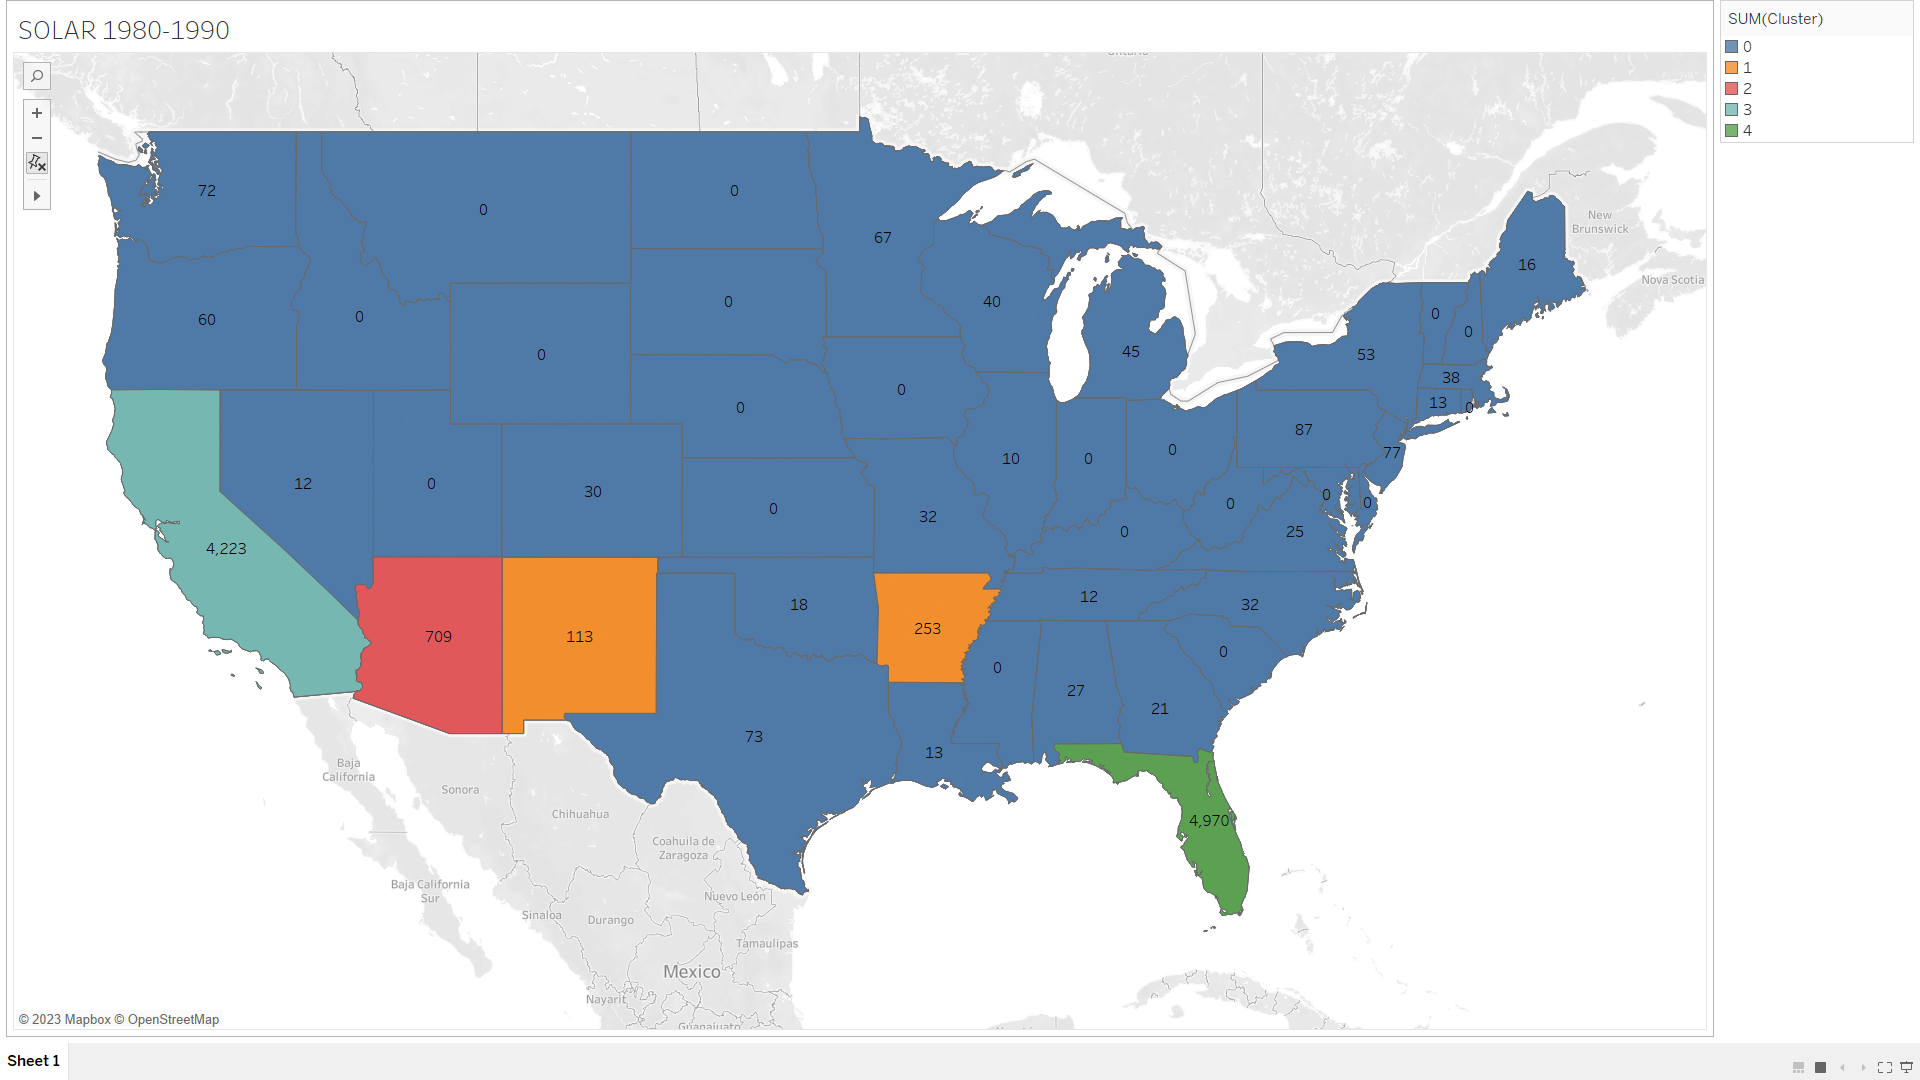

### Average for 1990 to 2000 and dividing it into 5 clusters

In [8]:
# Combine the average values for 1990-2000
average_values = pd.concat([average_1990_2000], axis=1)
average_values.columns = ['1990-2000']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1990-2000')

# Round off the values to 2 decimal places 
average_values['1990-2000'] = average_values['1990-2000'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1990-2000'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1990-2000')  
    cluster_min = cluster_states['1990-2000'].min()
    cluster_max = cluster_states['1990-2000'].max()
    for state, value in zip(cluster_states.index, cluster_states['1990-2000']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Solar_1990-2000.csv', index=True)



States in Cluster 0:
State: SD - Value: 0.0
State: ND - Value: 0.5
State: AK - Value: 0.7
State: DC - Value: 1.3
State: MT - Value: 1.7
State: ID - Value: 1.9
State: WY - Value: 2.0
State: KY - Value: 4.0
State: MS - Value: 7.9
State: IA - Value: 8.9
State: NE - Value: 13.3
State: VT - Value: 17.6
State: SC - Value: 18.9
State: DE - Value: 26.2
State: IN - Value: 26.2
State: NH - Value: 33.8
State: KS - Value: 35.2
State: WV - Value: 36.9
State: RI - Value: 40.4
State: UT - Value: 46.6
State: MD - Value: 47.8
State: OH - Value: 50.8
State: TN - Value: 59.8
State: LA - Value: 69.6
State: OK - Value: 81.8
State: ME - Value: 108.0
State: IL - Value: 122.0
State: VA - Value: 133.3
State: AL - Value: 140.5
State: MO - Value: 148.5
State: NC - Value: 155.6
State: CT - Value: 165.0
State: GA - Value: 166.9
State: MA - Value: 208.1
State: CO - Value: 210.3
State: WI - Value: 219.9
State: NV - Value: 230.5
State: MI - Value: 247.1
State: MN - Value: 342.9
State: WA - Value: 352.9
Cluster 0 Ran

## Mapping using Tablaue

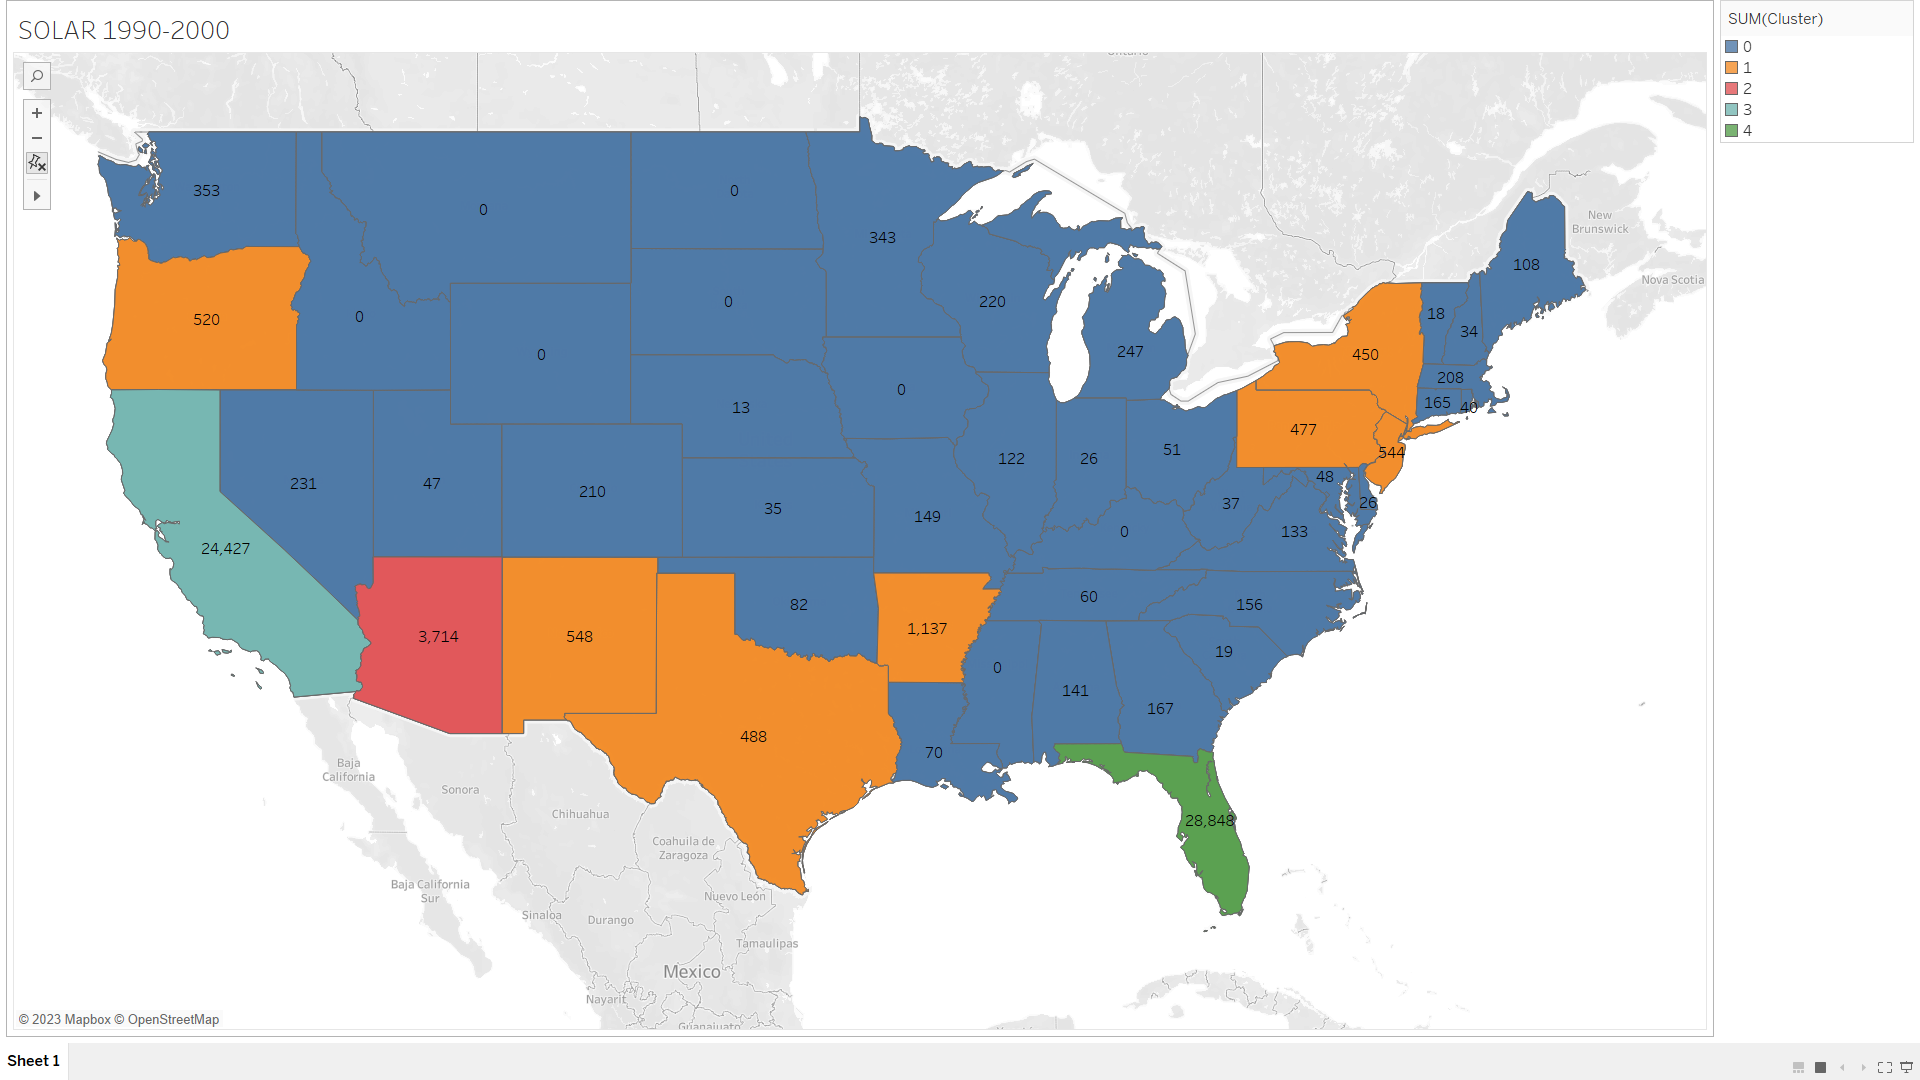

### Average for 2000 to 2010 and dividing it into 5 clusters

In [9]:
# Combine the average values for 2000-2010
average_values = pd.concat([average_2000_2010], axis=1)
average_values.columns = ['2000-2010']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2000-2010')

# Round off the values to 2 decimal places 
average_values['2000-2010'] = average_values['2000-2010'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2000-2010'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2000-2010')  
    cluster_min = cluster_states['2000-2010'].min()
    cluster_max = cluster_states['2000-2010'].max()
    for state, value in zip(cluster_states.index, cluster_states['2000-2010']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Solar_2000-2010.csv', index=True)



States in Cluster 0:
State: AK - Value: 0.8
State: ND - Value: 2.3
State: SD - Value: 3.4
State: WY - Value: 3.4
State: MS - Value: 10.2
State: ID - Value: 12.2
State: IA - Value: 14.5
State: MT - Value: 15.1
State: DC - Value: 15.5
State: NE - Value: 18.4
State: KS - Value: 21.7
State: SC - Value: 25.1
State: OK - Value: 29.7
State: KY - Value: 33.1
State: DE - Value: 38.0
State: TN - Value: 38.1
State: WV - Value: 38.5
State: RI - Value: 42.8
State: UT - Value: 45.0
State: NH - Value: 46.9
State: MO - Value: 47.4
State: VT - Value: 57.7
State: AL - Value: 67.3
State: LA - Value: 72.2
State: IN - Value: 80.6
State: MD - Value: 84.4
State: ME - Value: 109.8
State: WA - Value: 154.8
State: NC - Value: 186.5
State: OH - Value: 188.4
State: MN - Value: 191.2
State: WI - Value: 191.5
State: AR - Value: 217.6
State: NM - Value: 250.9
State: GA - Value: 258.6
State: MA - Value: 279.6
State: VA - Value: 314.6
State: MI - Value: 317.1
Cluster 0 Range: 0.80 - 317.10

States in Cluster 1:
State

### Mapping using Tablaue

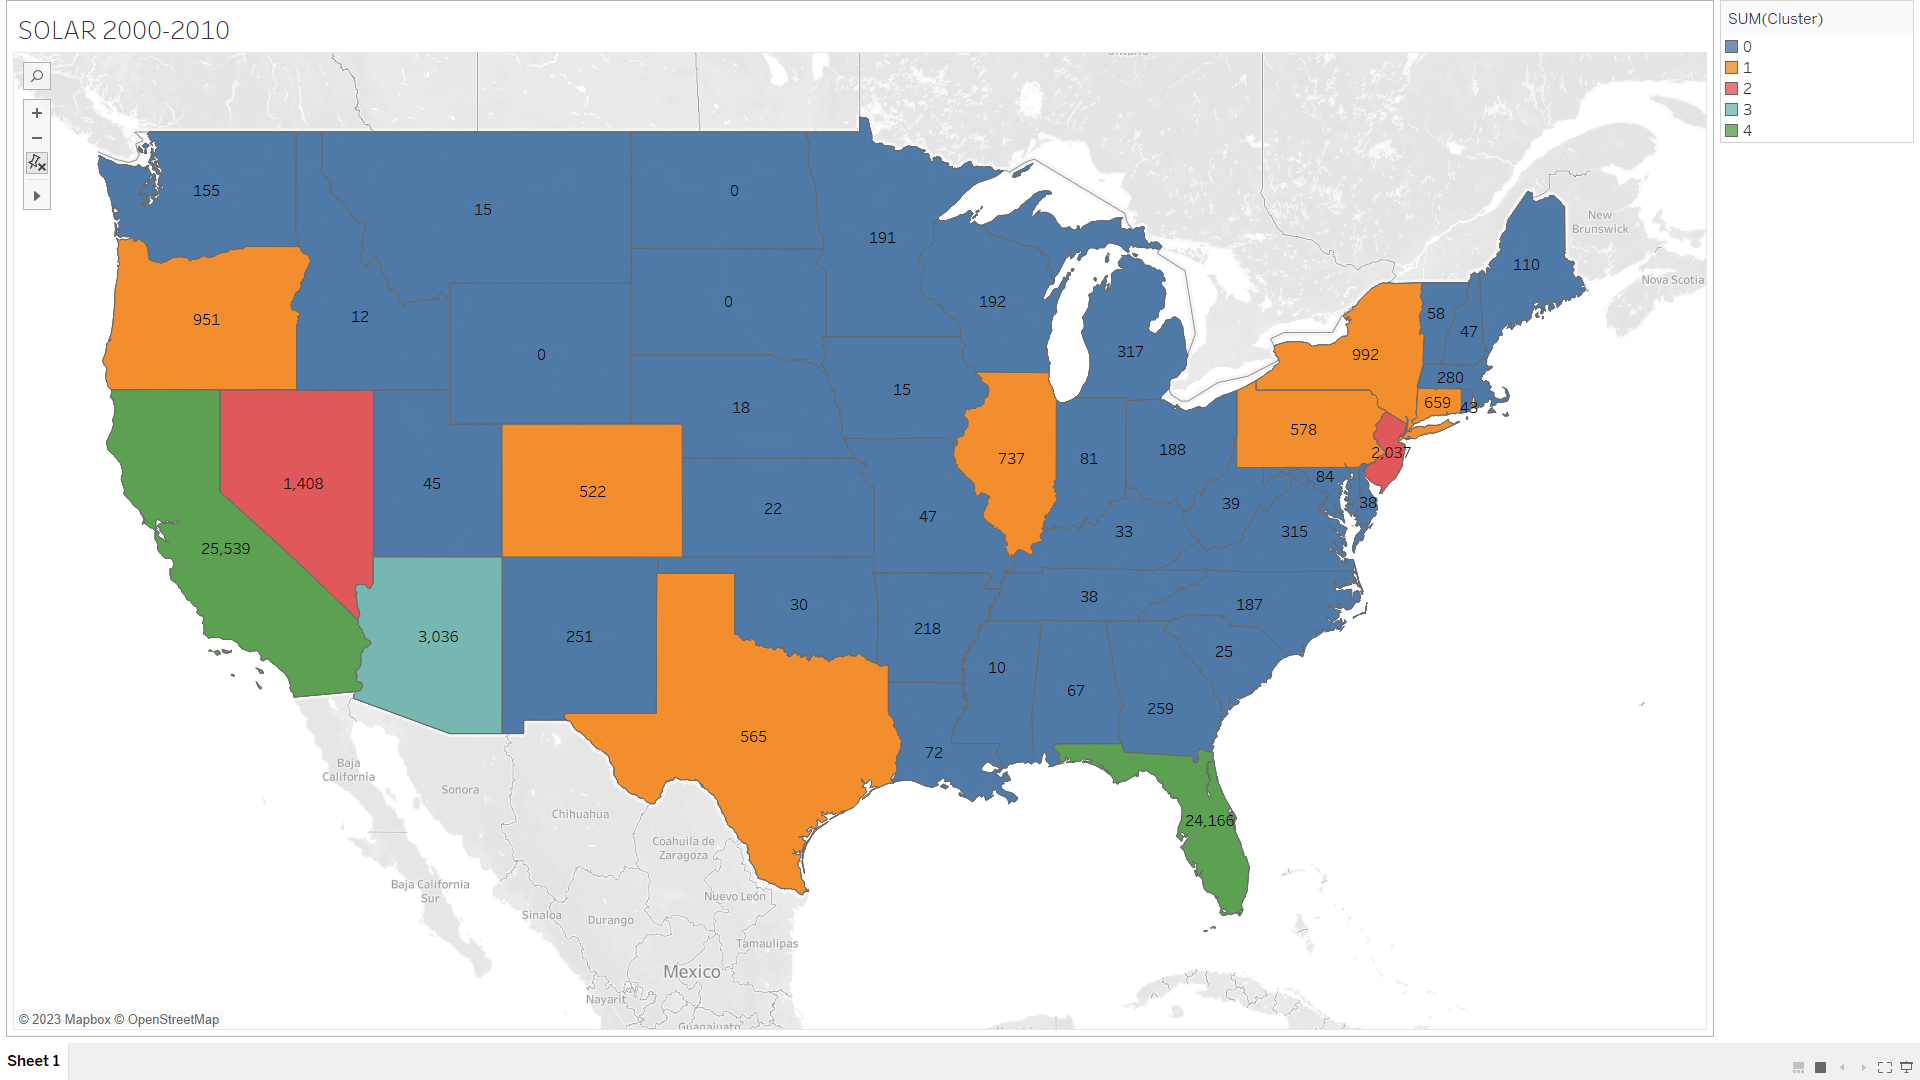

### Average for 2010 to 2020 and dividing it into 5 clusters

In [10]:
# Combine the average values for 2010-2020
average_values = pd.concat([average_2010_2020], axis=1)
average_values.columns = ['2010-2020']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2010-2020')

# Round off the values to 2 decimal places 
average_values['2010-2020'] = average_values['2010-2020'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2010-2020'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2010-2020')  
    cluster_min = cluster_states['2010-2020'].min()
    cluster_max = cluster_states['2010-2020'].max()
    for state, value in zip(cluster_states.index, cluster_states['2010-2020']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Solar_2010-2020.csv', index=True)



States in Cluster 0:
State: ND - Value: 7.5
State: AK - Value: 17.9
State: SD - Value: 18.2
State: WV - Value: 111.5
State: NE - Value: 198.4
State: KS - Value: 239.1
State: MT - Value: 239.5
State: OK - Value: 299.8
State: WY - Value: 349.2
State: KY - Value: 403.0
State: DC - Value: 476.2
State: ME - Value: 502.3
State: NH - Value: 607.5
State: IA - Value: 731.3
State: WI - Value: 863.1
State: AR - Value: 891.8
State: RI - Value: 974.9
State: WA - Value: 1064.7
State: MS - Value: 1110.6
State: DE - Value: 1162.1
State: AL - Value: 1317.4
State: VT - Value: 1418.0
State: LA - Value: 1468.5
State: MI - Value: 1479.4
State: TN - Value: 1611.5
State: MO - Value: 1840.7
State: OH - Value: 2039.6
State: ID - Value: 2170.0
State: IN - Value: 2178.4
State: IL - Value: 2476.7
State: SC - Value: 3878.4
State: VA - Value: 4132.5
State: CT - Value: 4176.0
State: PA - Value: 4332.7
State: MN - Value: 4710.1
State: OR - Value: 4942.3
Cluster 0 Range: 7.50 - 4942.30

States in Cluster 1:
State: MD

### Mapping Using Tablaue

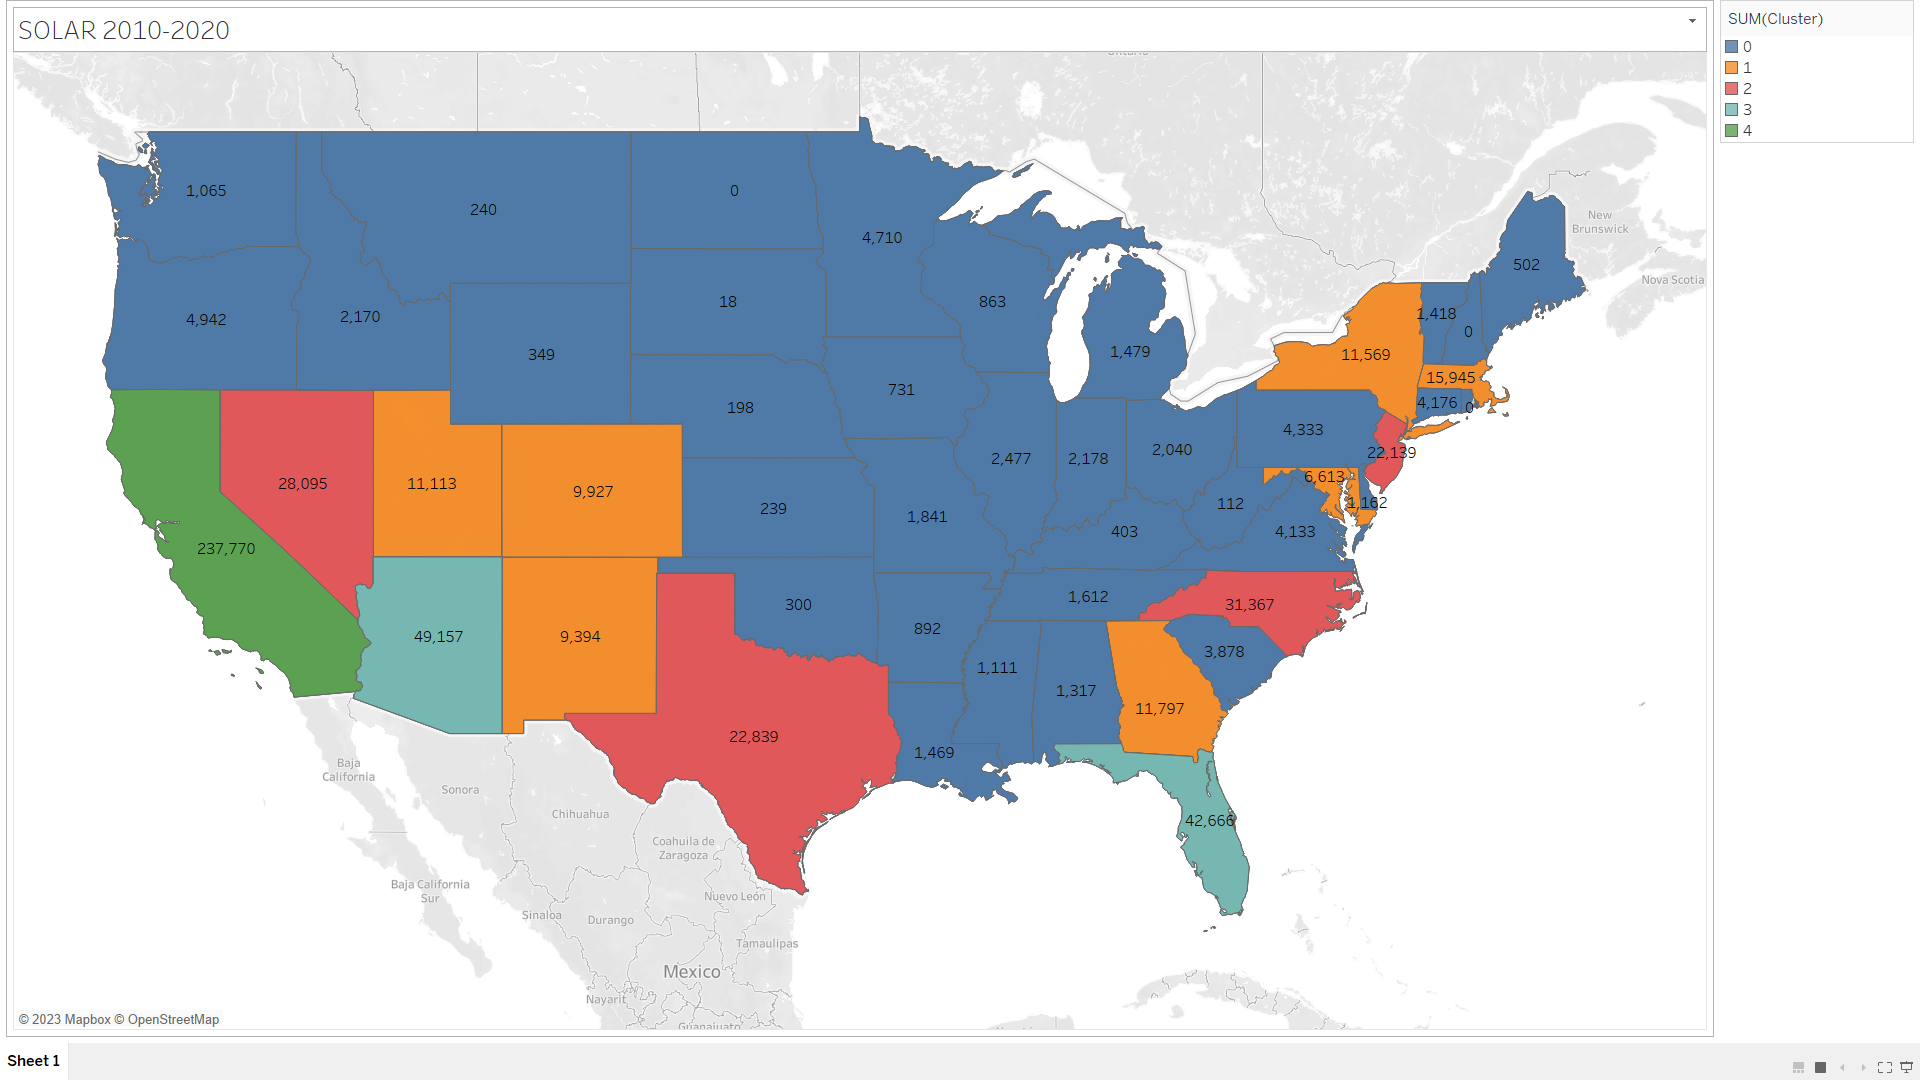

## Progression of the top 3 states 

### Progress of the states from 1980 to 1990

In [11]:
# Load the CSV file and read it
file_path = 'Solar_1980-1990.csv'
data = pd.read_csv(file_path, index_col=0)

# Define the list of state abbreviations you want to retrieve information about
state_abbreviations = ['CA','FL','AZ']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 1980-1990 interval:")
print(state_info)


Information for states in the 1980-1990 interval:
    1980-1990  Cluster State Full Name
AZ      709.0        2         Arizona
CA     4223.0        3      California
FL     4970.3        4         Florida


### Progress of the states from 1990 to 2000

In [12]:
# Load the CSV file and read it
file_path = 'Solar_1990-2000.csv'
data = pd.read_csv(file_path, index_col=0)

# Define the list of state abbreviations you want to retrieve information about
state_abbreviations = ['CA','FL','AZ']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 1990-2000 interval:")
print(state_info)


Information for states in the 1990-2000 interval:
    1990-2000  Cluster State Full Name
AZ     3714.2        2         Arizona
CA    24427.3        3      California
FL    28848.1        4         Florida


### Progress of the states from 2000 to 2010

In [13]:
# Load the CSV file and read it
file_path = 'Solar_2000-2010.csv' 
data = pd.read_csv(file_path, index_col=0)

# Define the list of state abbreviations you want to retrieve information about
state_abbreviations = ['CA','FL','AZ']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 2000-2010 interval
print("Information for states in the 2000-2010 interval:")
print(state_info)


Information for states in the 2000-2010 interval:
    2000-2010  Cluster State Full Name
AZ     3036.3        3         Arizona
FL    24165.6        4         Florida
CA    25539.2        4      California


### Progress of the states from 2010 to 2020

In [14]:
# Load the CSV file and read it
file_path = 'Solar_2010-2020.csv'
data = pd.read_csv(file_path, index_col=0)

# Define the list of state abbreviations you want to retrieve information about
state_abbreviations = ['CA','FL','AZ']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 2010-2020 interval:")
print(state_info)


Information for states in the 2010-2020 interval:
    2010-2020  Cluster State Full Name
FL    42666.1        3         Florida
AZ    49157.2        3         Arizona
CA   237770.0        4      California


### Plotting Using Matplot

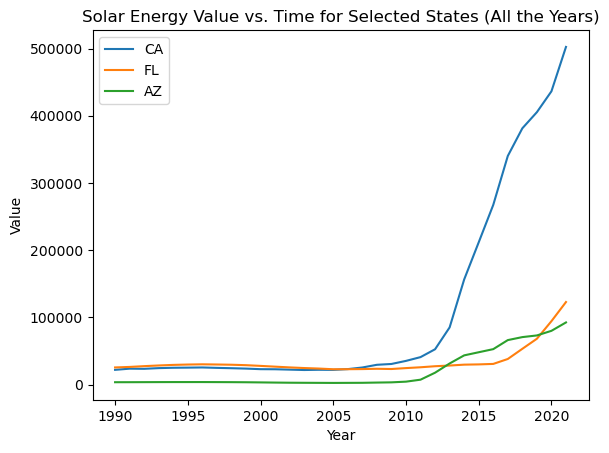

In [30]:
# Select only the 30 columns
Solar_60 = Solar.iloc[:, 30:62]

# Transpose the data to have years as rows and states as columns
Solar_T = Solar_60.transpose()

# Define the list of state abbreviations you want to plot
state_abbreviations =  ['CA','FL','AZ']

# Plot data for the selected states with the correct legend label
for state in state_abbreviations:
    plt.plot(Solar_T.index, Solar_T[state], label=state)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Solar Energy Value vs. Time for Selected States (All the Years)')
plt.legend(loc='best')

# Show the plot
plt.show()

## Deep Learning Forecasting

### LSTM 

In [6]:
# Define the sequence length and other parameters
sequence_length_lstm = 40
accuracy_threshold_lstm = 0.01  

# Loop through each selected state
state_mse_lstm = {}
state_rmse_lstm = {}
state_forecasts_lstm = {}
state_predictions_lstm = {} 

for state in ['CA','FL','AZ']:
    # Extract the data for the selected state
    data = Solar.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for LSTM
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_lstm):
        seq = scaled_data[i:i + sequence_length_lstm]
        target = scaled_data[i + sequence_length_lstm]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include data beyond 1969 for training
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train an LSTM model
    custom_optimizer = Adam(learning_rate=0.001)
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_lstm, 1), return_sequences=True))
    model_lstm.add(Dropout(0.5)) 
    model_lstm.add(LSTM(units=100, activation='relu'))
    model_lstm.add(Dropout(0.1))  
    model_lstm.add(Dense(units=1))
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')
    # Lists to store forecasts, actual values, and predictions
    forecasts_lstm = []
    actual_values_lstm = []
    predictions_lstm = []

    # Iterate through the forecast years
    current_sequence_lstm = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
        actual_value_lstm = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_lstm.reshape(1, sequence_length_lstm, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_lstm)
        mse_lstm = mean_squared_error([actual_value_lstm], [forecast_lstm[0]])
        model_lstm.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_lstm[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_lstm > accuracy_threshold_lstm:
            continue
        else:
            forecasts_lstm.append(forecast_lstm[0])
            actual_values_lstm.append(actual_value_lstm)

            # Store the prediction for the current year
            prediction_lstm = scaler.inverse_transform(forecast_lstm.reshape(-1, 1))[0][0]
            predictions_lstm.append(prediction_lstm)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_lstm = scaler.inverse_transform(np.array(forecasts_lstm).reshape(-1, 1))
    actual_values_lstm = scaler.inverse_transform(np.array(actual_values_lstm).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_lstm = mean_squared_error(actual_values_lstm, forecasts_lstm)

    # Calculate the root mean squared error (RMSE)
    rmse_lstm = np.sqrt(mse_lstm)

    state_mse_lstm[state] = mse_lstm
    state_rmse_lstm[state] = rmse_lstm

    # Forecast for 2022 and 2023
    forecast_2022_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2022_lstm[0])
    forecast_2023_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_lstm = scaler.inverse_transform(forecast_2022_lstm.reshape(-1, 1))[0][0]
    forecast_2023_lstm = scaler.inverse_transform(forecast_2023_lstm.reshape(-1, 1))[0][0]
    state_forecasts_lstm[state] = {'2022': forecast_2022_lstm, '2023': forecast_2023_lstm}

    # Store predictions for 2019, 2020, and 2021
    forecast_2019_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2019_lstm[0])
    forecast_2020_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2020_lstm[0])
    forecast_2021_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2021_lstm[0])

    # Inverse transform the predictions to the original scale
    prediction_2019_lstm = scaler.inverse_transform(forecast_2019_lstm.reshape(-1, 1))[0][0]
    prediction_2020_lstm = scaler.inverse_transform(forecast_2020_lstm.reshape(-1, 1))[0][0]
    prediction_2021_lstm = scaler.inverse_transform(forecast_2021_lstm.reshape(-1, 1))[0][0]
    state_predictions_lstm[state] = {'2019': prediction_2019_lstm, '2020': prediction_2020_lstm, '2021': prediction_2021_lstm}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_lstm.items():
    print(f"MSE for {state} (LSTM): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_lstm.items():
    print(f"RMSE for {state} (LSTM): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_lstm.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_lstm.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year
state_accuracies_lstm = {}

for state in state_predictions_lstm:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Solar.loc[state].loc[int(year)]
        predicted_value = state_predictions_lstm[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_lstm[state] = accuracies_state

# Print accuracies for each state and year
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States:")
for state, accuracies_state in state_accuracies_lstm.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 1s 558ms/step
Epoch 1/20
23/23 [==============================] - 4s 18ms/step - loss: 0.1094
Epoch 2/20
23/23 [==============================] - 0s 18ms/step - loss: 0.0984
Epoch 3/20
23/23 [==============================] - 0s 18ms/step - loss: 0.0857
Epoch 4/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0989
Epoch 5/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0795
Epoch 6/20
23/23 [==============================] - 0s 20ms/step - loss: 0.0768
Epoch 7/20
23/23 [==============================] - 0s 21ms/step - loss: 0.0609
Epoch 8/20
23/23 [==============================] - 0s 20ms/step - loss: 0.0564
Epoch 9/20
23/23 [==============================] - 0s 21ms/step - loss: 0.0660
Epoch 10/20
23/23 [==============================] - 1s 25ms/step - loss: 0.0790
Epoch 11/20
23/23 [==============================] - 1s 26ms/step - loss: 0.0907
Epoch 12/20
23/23 [==============================] - 1s 24ms/step

32/32 [==============================] - 1s 19ms/step - loss: 0.0171
Epoch 18/20
32/32 [==============================] - 1s 19ms/step - loss: 0.0276
Epoch 19/20
32/32 [==============================] - 1s 19ms/step - loss: 0.0201
Epoch 20/20
1/1 [==============================] - 0s 36ms/step
Epoch 1/20
33/33 [==============================] - 1s 20ms/step - loss: 0.0254
Epoch 2/20
33/33 [==============================] - 1s 19ms/step - loss: 0.0224
Epoch 3/20
33/33 [==============================] - 1s 18ms/step - loss: 0.0212
Epoch 4/20
33/33 [==============================] - 1s 19ms/step - loss: 0.0166
Epoch 5/20
33/33 [==============================] - 1s 19ms/step - loss: 0.0142
Epoch 6/20
33/33 [==============================] - 1s 19ms/step - loss: 0.0375
Epoch 7/20
33/33 [==============================] - 1s 19ms/step - loss: 0.0264
Epoch 8/20
33/33 [==============================] - 1s 19ms/step - loss: 0.0213
Epoch 9/20
33/33 [==============================] - 1s 19ms/step 

42/42 [==============================] - 1s 20ms/step - loss: 0.0171
Epoch 14/20
42/42 [==============================] - 1s 21ms/step - loss: 0.0196
Epoch 15/20
42/42 [==============================] - 1s 20ms/step - loss: 0.0127
Epoch 16/20
42/42 [==============================] - 1s 21ms/step - loss: 0.0130
Epoch 17/20
42/42 [==============================] - 1s 23ms/step - loss: 0.0098
Epoch 18/20
42/42 [==============================] - 1s 22ms/step - loss: 0.0163
Epoch 19/20
42/42 [==============================] - 1s 23ms/step - loss: 0.0161
Epoch 20/20
1/1 [==============================] - 0s 38ms/step
Epoch 1/20
43/43 [==============================] - 1s 23ms/step - loss: 0.0144
Epoch 2/20
43/43 [==============================] - 1s 19ms/step - loss: 0.0192
Epoch 3/20
43/43 [==============================] - 1s 20ms/step - loss: 0.0170
Epoch 4/20
43/43 [==============================] - 1s 21ms/step - loss: 0.0179
Epoch 5/20
43/43 [==============================] - 1s 21ms/s

52/52 [==============================] - 1s 19ms/step - loss: 0.0152
Epoch 10/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0135
Epoch 11/20
52/52 [==============================] - 1s 20ms/step - loss: 0.0134
Epoch 12/20
52/52 [==============================] - 1s 20ms/step - loss: 0.0116
Epoch 13/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0128
Epoch 14/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0176
Epoch 15/20
52/52 [==============================] - 1s 20ms/step - loss: 0.0174
Epoch 16/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0116
Epoch 17/20
52/52 [==============================] - 1s 20ms/step - loss: 0.0089
Epoch 18/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0133
Epoch 19/20
52/52 [==============================] - 1s 20ms/step - loss: 0.0102
Epoch 20/20
1/1 [==============================] - 0s 36ms/step
Epoch 1/20
53/53 [==============================] - 1s 19

62/62 [==============================] - 1s 19ms/step - loss: 0.0124
Epoch 6/20
62/62 [==============================] - 1s 19ms/step - loss: 0.0167
Epoch 7/20
62/62 [==============================] - 1s 19ms/step - loss: 0.0139
Epoch 8/20
62/62 [==============================] - 1s 19ms/step - loss: 0.0178
Epoch 9/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0120
Epoch 10/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0167
Epoch 11/20
62/62 [==============================] - 1s 21ms/step - loss: 0.0111
Epoch 12/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0133
Epoch 13/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0140
Epoch 14/20
62/62 [==============================] - 1s 19ms/step - loss: 0.0134
Epoch 15/20
62/62 [==============================] - 1s 19ms/step - loss: 0.0163
Epoch 16/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0108
Epoch 17/20
62/62 [=========================

1/1 [==============================] - 0s 39ms/step
Epoch 1/20
27/27 [==============================] - 1s 19ms/step - loss: 0.0250
Epoch 2/20
27/27 [==============================] - 1s 19ms/step - loss: 0.0442
Epoch 3/20
27/27 [==============================] - 1s 21ms/step - loss: 0.0350
Epoch 4/20
27/27 [==============================] - 1s 19ms/step - loss: 0.0344
Epoch 5/20
27/27 [==============================] - 1s 19ms/step - loss: 0.0353
Epoch 6/20
27/27 [==============================] - 1s 19ms/step - loss: 0.0338
Epoch 7/20
27/27 [==============================] - 1s 19ms/step - loss: 0.0344
Epoch 8/20
27/27 [==============================] - 1s 19ms/step - loss: 0.0349
Epoch 9/20
27/27 [==============================] - 1s 20ms/step - loss: 0.0365
Epoch 10/20
27/27 [==============================] - 1s 19ms/step - loss: 0.0297
Epoch 11/20
27/27 [==============================] - 1s 21ms/step - loss: 0.0379
Epoch 12/20
27/27 [==============================] - 1s 21ms/step 

36/36 [==============================] - 1s 19ms/step - loss: 0.0200
Epoch 18/20
36/36 [==============================] - 1s 19ms/step - loss: 0.0155
Epoch 19/20
36/36 [==============================] - 1s 19ms/step - loss: 0.0218
Epoch 20/20
1/1 [==============================] - 0s 34ms/step
Epoch 1/20
37/37 [==============================] - 1s 18ms/step - loss: 0.0173
Epoch 2/20
37/37 [==============================] - 1s 19ms/step - loss: 0.0233
Epoch 3/20
37/37 [==============================] - 1s 19ms/step - loss: 0.0215
Epoch 4/20
37/37 [==============================] - 1s 23ms/step - loss: 0.0261
Epoch 5/20
37/37 [==============================] - 1s 20ms/step - loss: 0.0198
Epoch 6/20
37/37 [==============================] - 1s 22ms/step - loss: 0.0206
Epoch 7/20
37/37 [==============================] - 1s 19ms/step - loss: 0.0124
Epoch 8/20
37/37 [==============================] - 1s 23ms/step - loss: 0.0179
Epoch 9/20
37/37 [==============================] - 1s 20ms/step 

46/46 [==============================] - 1s 22ms/step - loss: 0.0168
Epoch 14/20
46/46 [==============================] - 1s 21ms/step - loss: 0.0172
Epoch 15/20
46/46 [==============================] - 1s 22ms/step - loss: 0.0198
Epoch 16/20
46/46 [==============================] - 1s 22ms/step - loss: 0.0120
Epoch 17/20
46/46 [==============================] - 1s 20ms/step - loss: 0.0151
Epoch 18/20
46/46 [==============================] - 1s 23ms/step - loss: 0.0165
Epoch 19/20
46/46 [==============================] - 1s 24ms/step - loss: 0.0145
Epoch 20/20
1/1 [==============================] - 0s 36ms/step
Epoch 1/20
47/47 [==============================] - 1s 20ms/step - loss: 0.0124
Epoch 2/20
47/47 [==============================] - 1s 19ms/step - loss: 0.0152
Epoch 3/20
47/47 [==============================] - 1s 20ms/step - loss: 0.0098
Epoch 4/20
47/47 [==============================] - 1s 20ms/step - loss: 0.0113
Epoch 5/20
47/47 [==============================] - 1s 19ms/s

56/56 [==============================] - 1s 21ms/step - loss: 0.0128
Epoch 10/20
56/56 [==============================] - 1s 20ms/step - loss: 0.0102
Epoch 11/20
56/56 [==============================] - 1s 20ms/step - loss: 0.0150
Epoch 12/20
56/56 [==============================] - 1s 20ms/step - loss: 0.0095
Epoch 13/20
56/56 [==============================] - 1s 20ms/step - loss: 0.0112
Epoch 14/20
56/56 [==============================] - 1s 19ms/step - loss: 0.0111
Epoch 15/20
56/56 [==============================] - 1s 21ms/step - loss: 0.0148
Epoch 16/20
56/56 [==============================] - 1s 21ms/step - loss: 0.0122
Epoch 17/20
56/56 [==============================] - 1s 21ms/step - loss: 0.0123
Epoch 18/20
56/56 [==============================] - 1s 21ms/step - loss: 0.0077
Epoch 19/20
56/56 [==============================] - 1s 22ms/step - loss: 0.0109
Epoch 20/20
1/1 [==============================] - 0s 29ms/step
Epoch 1/20
57/57 [==============================] - 1s 18

26/26 [==============================] - 0s 19ms/step - loss: 0.0415
Epoch 3/20
26/26 [==============================] - 1s 20ms/step - loss: 0.0527
Epoch 4/20
26/26 [==============================] - 1s 20ms/step - loss: 0.0339
Epoch 5/20
26/26 [==============================] - 0s 19ms/step - loss: 0.0321
Epoch 6/20
26/26 [==============================] - 1s 21ms/step - loss: 0.0352
Epoch 7/20
26/26 [==============================] - 0s 18ms/step - loss: 0.0464
Epoch 8/20
26/26 [==============================] - 0s 19ms/step - loss: 0.0456
Epoch 9/20
26/26 [==============================] - 0s 19ms/step - loss: 0.0403
Epoch 10/20
26/26 [==============================] - 1s 20ms/step - loss: 0.0414
Epoch 11/20
26/26 [==============================] - 0s 19ms/step - loss: 0.0369
Epoch 12/20
26/26 [==============================] - 1s 19ms/step - loss: 0.0368
Epoch 13/20
26/26 [==============================] - 0s 18ms/step - loss: 0.0329
Epoch 14/20
26/26 [============================

35/35 [==============================] - 1s 20ms/step - loss: 0.0287
Epoch 20/20
1/1 [==============================] - 0s 40ms/step
Epoch 1/20
36/36 [==============================] - 1s 20ms/step - loss: 0.0218
Epoch 2/20
36/36 [==============================] - 1s 19ms/step - loss: 0.0243
Epoch 3/20
36/36 [==============================] - 1s 21ms/step - loss: 0.0187
Epoch 4/20
36/36 [==============================] - 1s 19ms/step - loss: 0.0252
Epoch 5/20
36/36 [==============================] - 1s 20ms/step - loss: 0.0220
Epoch 6/20
36/36 [==============================] - 1s 20ms/step - loss: 0.0209
Epoch 7/20
36/36 [==============================] - 1s 21ms/step - loss: 0.0201
Epoch 8/20
36/36 [==============================] - 1s 20ms/step - loss: 0.0184
Epoch 9/20
36/36 [==============================] - 1s 21ms/step - loss: 0.0265
Epoch 10/20
36/36 [==============================] - 1s 19ms/step - loss: 0.0162
Epoch 11/20
36/36 [==============================] - 1s 23ms/step 

45/45 [==============================] - 2s 45ms/step - loss: 0.0192
Epoch 16/20
45/45 [==============================] - 2s 45ms/step - loss: 0.0121
Epoch 17/20
45/45 [==============================] - 2s 44ms/step - loss: 0.0202
Epoch 18/20
45/45 [==============================] - 2s 45ms/step - loss: 0.0178
Epoch 19/20
45/45 [==============================] - 2s 44ms/step - loss: 0.0183
Epoch 20/20
1/1 [==============================] - 0s 61ms/step
Epoch 1/20
46/46 [==============================] - 2s 44ms/step - loss: 0.0163
Epoch 2/20
46/46 [==============================] - 2s 43ms/step - loss: 0.0157
Epoch 3/20
46/46 [==============================] - 2s 44ms/step - loss: 0.0227
Epoch 4/20
46/46 [==============================] - 2s 43ms/step - loss: 0.0192
Epoch 5/20
46/46 [==============================] - 2s 44ms/step - loss: 0.0152
Epoch 6/20
46/46 [==============================] - 2s 44ms/step - loss: 0.0152
Epoch 7/20
46/46 [==============================] - 2s 44ms/ste

55/55 [==============================] - 2s 44ms/step - loss: 0.0149
Epoch 12/20
55/55 [==============================] - 2s 45ms/step - loss: 0.0107
Epoch 13/20
55/55 [==============================] - 2s 45ms/step - loss: 0.0161
Epoch 14/20
55/55 [==============================] - 3s 45ms/step - loss: 0.0138
Epoch 15/20
55/55 [==============================] - 2s 44ms/step - loss: 0.0131
Epoch 16/20
55/55 [==============================] - 2s 44ms/step - loss: 0.0115
Epoch 17/20
55/55 [==============================] - 2s 43ms/step - loss: 0.0210
Epoch 18/20
55/55 [==============================] - 2s 44ms/step - loss: 0.0143
Epoch 19/20
55/55 [==============================] - 2s 44ms/step - loss: 0.0145
Epoch 20/20
1/1 [==============================] - 0s 94ms/step
Epoch 1/20
56/56 [==============================] - 2s 44ms/step - loss: 0.0122
Epoch 2/20
56/56 [==============================] - 2s 44ms/step - loss: 0.0164
Epoch 3/20
56/56 [==============================] - 2s 44ms

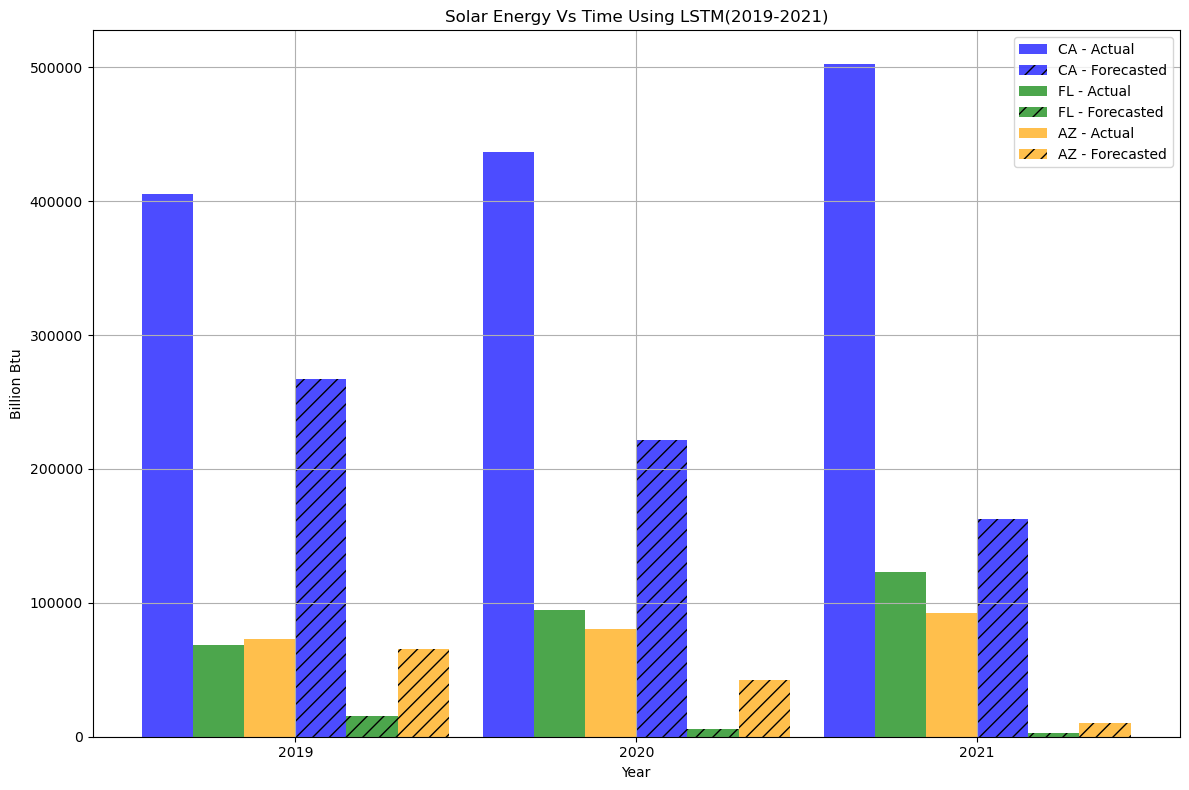

In [35]:
# Define the list of state abbreviations you want to plot
state_abbreviations =  ['CA','FL','AZ']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Solar_T.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.15 

# Define colors for each state
state_colors = {'CA': 'blue', 'FL': 'green', 'AZ': 'orange'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_lstm[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Solar Energy Vs Time Using LSTM(2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()


### GRU

In [15]:
# Define the sequence length and other parameters
sequence_length_gru = 50
accuracy_threshold_gru = 0.01

# Loop through each selected state
state_mse_gru = {}
state_rmse_gru = {}
state_forecasts_gru = {}
state_predictions_gru = {}

for state in ['CA','FL','AZ']:
    # Extract the data for the selected state
    data = Solar.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for GRU
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_gru):
        seq = scaled_data[i:i + sequence_length_gru]
        target = scaled_data[i + sequence_length_gru]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train a GRU model with additional layer and custom learning rate
    model_gru = Sequential()
    model_gru.add(GRU(units=50, activation='relu', input_shape=(sequence_length_gru, 1), return_sequences=True))
    model_gru.add(GRU(units=50, activation='relu'))  
    model_gru.add(Dense(units=1))
    custom_optimizer = Adam(learning_rate=0.001) 
    model_gru.compile(optimizer=custom_optimizer, loss='mean_squared_error')
    # Lists to store forecast
    forecasts_gru = []
    # Lists to store actual values
    actual_values_gru = []
    # Lists to store predictions
    predictions_gru = []
    # Iterate through the forecast years
    current_sequence_gru = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
        actual_value_gru = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_gru.reshape(1, sequence_length_gru, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_gru)
        mse_gru = mean_squared_error([actual_value_gru], [forecast_gru[0]])
        model_gru.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_gru = np.append(current_sequence_gru[1:], forecast_gru[0])
        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_gru > accuracy_threshold_gru:
            continue
        else:
            forecasts_gru.append(forecast_gru[0])
            actual_values_gru.append(actual_value_gru)
            # Store the prediction for the current year
            prediction_gru = scaler.inverse_transform(forecast_gru.reshape(-1, 1))[0][0]
            predictions_gru.append(prediction_gru)
    # Inverse transform the forecasts and actual values to the original scale
    forecasts_gru = scaler.inverse_transform(np.array(forecasts_gru).reshape(-1, 1))
    actual_values_gru = scaler.inverse_transform(np.array(actual_values_gru).reshape(-1, 1))
    # Calculate the MSE
    mse_gru = mean_squared_error(actual_values_gru, forecasts_gru)
    # Calculate the RMSE
    rmse_gru = np.sqrt(mse_gru)
    state_mse_gru[state] = mse_gru
    state_rmse_gru[state] = rmse_gru

    # Forecast for 2022 and 2023
    forecast_2022_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2022_gru[0])
    forecast_2023_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_gru = scaler.inverse_transform(forecast_2022_gru.reshape(-1, 1))[0][0]
    forecast_2023_gru = scaler.inverse_transform(forecast_2023_gru.reshape(-1, 1))[0][0]
    # Store predictions for 2022 and 2023
    state_forecasts_gru[state] = {'2022': forecast_2022_gru, '2023': forecast_2023_gru}

    # Forecast and Store predictions for 2019
    forecast_2019_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2019_gru[0])
    # Forecast and Store predictions for 2020
    forecast_2020_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2020_gru[0])
    # Forecast and Store predictions for 2021
    forecast_2021_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2021_gru[0])

    # Inverse transform the predictions for 2019
    prediction_2019_gru = scaler.inverse_transform(forecast_2019_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_gru = scaler.inverse_transform(forecast_2020_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_gru = scaler.inverse_transform(forecast_2021_gru.reshape(-1, 1))[0][0]
    state_predictions_gru[state] = {'2019': prediction_2019_gru, '2020': prediction_2020_gru, '2021': prediction_2021_gru}

# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_gru.items():
    print(f"MSE for {state} (GRU): {mse_value:.2f}")

# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_gru.items():
    print(f"RMSE for {state} (GRU): {rmse_value:.2f}")

# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_gru.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_gru.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for GRU
state_accuracies_gru = {}

for state in state_predictions_gru:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Solar.loc[state].loc[int(year)]
        predicted_value = state_predictions_gru[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_gru[state] = accuracies_state

# Print accuracies for each state and year for GRU
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (GRU):")
for state, accuracies_state in state_accuracies_gru.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")


1/1 [==============================] - 1s 999ms/step
Epoch 1/20
13/13 [==============================] - 6s 42ms/step - loss: 0.1973
Epoch 2/20
13/13 [==============================] - 1s 42ms/step - loss: 0.1034
Epoch 3/20
13/13 [==============================] - 1s 44ms/step - loss: 0.0752
Epoch 4/20
13/13 [==============================] - 1s 43ms/step - loss: 0.0832
Epoch 5/20
13/13 [==============================] - 1s 44ms/step - loss: 0.0744
Epoch 6/20
13/13 [==============================] - 1s 42ms/step - loss: 0.0750
Epoch 7/20
13/13 [==============================] - 1s 41ms/step - loss: 0.0747
Epoch 8/20
13/13 [==============================] - 1s 44ms/step - loss: 0.0810
Epoch 9/20
13/13 [==============================] - 1s 43ms/step - loss: 0.0716
Epoch 10/20
13/13 [==============================] - 1s 43ms/step - loss: 0.0761
Epoch 11/20
13/13 [==============================] - 1s 42ms/step - loss: 0.0762
Epoch 12/20
13/13 [==============================] - 1s 42ms/step

22/22 [==============================] - 1s 41ms/step - loss: 0.0289
Epoch 18/20
22/22 [==============================] - 1s 42ms/step - loss: 0.0269
Epoch 19/20
22/22 [==============================] - 1s 42ms/step - loss: 0.0286
Epoch 20/20
1/1 [==============================] - 0s 64ms/step
Epoch 1/20
23/23 [==============================] - 1s 42ms/step - loss: 0.0268
Epoch 2/20
23/23 [==============================] - 1s 41ms/step - loss: 0.0292
Epoch 3/20
23/23 [==============================] - 1s 41ms/step - loss: 0.0270
Epoch 4/20
23/23 [==============================] - 1s 42ms/step - loss: 0.0294
Epoch 5/20
23/23 [==============================] - 1s 44ms/step - loss: 0.0257
Epoch 6/20
23/23 [==============================] - 1s 41ms/step - loss: 0.0253
Epoch 7/20
23/23 [==============================] - 1s 41ms/step - loss: 0.0273
Epoch 8/20
23/23 [==============================] - 1s 41ms/step - loss: 0.0254
Epoch 9/20
23/23 [==============================] - 1s 40ms/step 

32/32 [==============================] - 1s 41ms/step - loss: 0.0201
Epoch 14/20
32/32 [==============================] - 1s 41ms/step - loss: 0.0202
Epoch 15/20
32/32 [==============================] - 1s 41ms/step - loss: 0.0200
Epoch 16/20
32/32 [==============================] - 1s 41ms/step - loss: 0.0209
Epoch 17/20
32/32 [==============================] - 1s 43ms/step - loss: 0.0206
Epoch 18/20
32/32 [==============================] - 1s 41ms/step - loss: 0.0205
Epoch 19/20
32/32 [==============================] - 1s 43ms/step - loss: 0.0206
Epoch 20/20
1/1 [==============================] - 0s 67ms/step
Epoch 1/20
33/33 [==============================] - 1s 42ms/step - loss: 0.0179
Epoch 2/20
33/33 [==============================] - 1s 41ms/step - loss: 0.0174
Epoch 3/20
33/33 [==============================] - 1s 40ms/step - loss: 0.0182
Epoch 4/20
33/33 [==============================] - 1s 41ms/step - loss: 0.0186
Epoch 5/20
33/33 [==============================] - 1s 41ms/s

42/42 [==============================] - 2s 42ms/step - loss: 0.0141
Epoch 10/20
42/42 [==============================] - 2s 41ms/step - loss: 0.0159
Epoch 11/20
42/42 [==============================] - 2s 42ms/step - loss: 0.0137
Epoch 12/20
42/42 [==============================] - 2s 42ms/step - loss: 0.0137
Epoch 13/20
42/42 [==============================] - 2s 41ms/step - loss: 0.0148
Epoch 14/20
42/42 [==============================] - 2s 42ms/step - loss: 0.0150
Epoch 15/20
42/42 [==============================] - 2s 44ms/step - loss: 0.0143
Epoch 16/20
42/42 [==============================] - 2s 41ms/step - loss: 0.0147
Epoch 17/20
42/42 [==============================] - 2s 41ms/step - loss: 0.0143
Epoch 18/20
42/42 [==============================] - 2s 42ms/step - loss: 0.0158
Epoch 19/20
42/42 [==============================] - 2s 41ms/step - loss: 0.0152
Epoch 20/20
1/1 [==============================] - 0s 67ms/step
Epoch 1/20
43/43 [==============================] - 2s 41

52/52 [==============================] - 2s 42ms/step - loss: 0.0110
Epoch 6/20
52/52 [==============================] - 2s 41ms/step - loss: 0.0112
Epoch 7/20
52/52 [==============================] - 2s 41ms/step - loss: 0.0122
Epoch 8/20
52/52 [==============================] - 2s 41ms/step - loss: 0.0113
Epoch 9/20
52/52 [==============================] - 2s 41ms/step - loss: 0.0113
Epoch 10/20
52/52 [==============================] - 2s 40ms/step - loss: 0.0107
Epoch 11/20
52/52 [==============================] - 2s 40ms/step - loss: 0.0109
Epoch 12/20
52/52 [==============================] - 2s 40ms/step - loss: 0.0114
Epoch 13/20
52/52 [==============================] - 2s 42ms/step - loss: 0.0109
Epoch 14/20
52/52 [==============================] - 2s 41ms/step - loss: 0.0115
Epoch 15/20
52/52 [==============================] - 2s 41ms/step - loss: 0.0110
Epoch 16/20
52/52 [==============================] - 2s 40ms/step - loss: 0.0121
Epoch 17/20
52/52 [=========================

62/62 [==============================] - 3s 40ms/step - loss: 0.0099
Epoch 2/20
62/62 [==============================] - 3s 41ms/step - loss: 0.0104
Epoch 3/20
62/62 [==============================] - 3s 41ms/step - loss: 0.0097
Epoch 4/20
62/62 [==============================] - 3s 41ms/step - loss: 0.0104
Epoch 5/20
62/62 [==============================] - 3s 41ms/step - loss: 0.0106
Epoch 6/20
62/62 [==============================] - 3s 41ms/step - loss: 0.0097
Epoch 7/20
62/62 [==============================] - 3s 41ms/step - loss: 0.0097
Epoch 8/20
62/62 [==============================] - 3s 41ms/step - loss: 0.0104
Epoch 9/20
62/62 [==============================] - 3s 41ms/step - loss: 0.0126
Epoch 10/20
62/62 [==============================] - 3s 43ms/step - loss: 0.3599
Epoch 11/20
62/62 [==============================] - 3s 42ms/step - loss: 0.0175
Epoch 12/20
62/62 [==============================] - 3s 41ms/step - loss: 0.0151
Epoch 13/20
62/62 [=============================

16/16 [==============================] - 1s 41ms/step - loss: 0.0418
Epoch 18/20
16/16 [==============================] - 1s 42ms/step - loss: 0.0417
Epoch 19/20
16/16 [==============================] - 1s 43ms/step - loss: 0.0409
Epoch 20/20
1/1 [==============================] - 0s 65ms/step
Epoch 1/20
17/17 [==============================] - 1s 43ms/step - loss: 0.0415
Epoch 2/20
17/17 [==============================] - 1s 42ms/step - loss: 0.0430
Epoch 3/20
17/17 [==============================] - 1s 43ms/step - loss: 0.0442
Epoch 4/20
17/17 [==============================] - 1s 41ms/step - loss: 0.0403
Epoch 5/20
17/17 [==============================] - 1s 43ms/step - loss: 0.0397
Epoch 6/20
17/17 [==============================] - 1s 42ms/step - loss: 0.0417
Epoch 7/20
17/17 [==============================] - 1s 43ms/step - loss: 0.0418
Epoch 8/20
17/17 [==============================] - 1s 42ms/step - loss: 0.0449
Epoch 9/20
17/17 [==============================] - 1s 43ms/step 

26/26 [==============================] - 1s 42ms/step - loss: 0.0240
Epoch 14/20
26/26 [==============================] - 1s 42ms/step - loss: 0.0228
Epoch 15/20
26/26 [==============================] - 1s 41ms/step - loss: 0.0238
Epoch 16/20
26/26 [==============================] - 1s 42ms/step - loss: 0.0225
Epoch 17/20
26/26 [==============================] - 1s 42ms/step - loss: 0.0230
Epoch 18/20
26/26 [==============================] - 1s 41ms/step - loss: 0.0233
Epoch 19/20
26/26 [==============================] - 1s 41ms/step - loss: 0.0230
Epoch 20/20
1/1 [==============================] - 0s 64ms/step
Epoch 1/20
27/27 [==============================] - 1s 42ms/step - loss: 0.0216
Epoch 2/20
27/27 [==============================] - 1s 41ms/step - loss: 0.0218
Epoch 3/20
27/27 [==============================] - 1s 41ms/step - loss: 0.0228
Epoch 4/20
27/27 [==============================] - 1s 40ms/step - loss: 0.0223
Epoch 5/20
27/27 [==============================] - 1s 42ms/s

36/36 [==============================] - 2s 42ms/step - loss: 0.0171
Epoch 10/20
36/36 [==============================] - 2s 42ms/step - loss: 0.0174
Epoch 11/20
36/36 [==============================] - 2s 43ms/step - loss: 0.0171
Epoch 12/20
36/36 [==============================] - 2s 43ms/step - loss: 0.0178
Epoch 13/20
36/36 [==============================] - 2s 42ms/step - loss: 0.0168
Epoch 14/20
36/36 [==============================] - 2s 42ms/step - loss: 0.0164
Epoch 15/20
36/36 [==============================] - 2s 43ms/step - loss: 0.0169
Epoch 16/20
36/36 [==============================] - 1s 41ms/step - loss: 0.0162
Epoch 17/20
36/36 [==============================] - 2s 42ms/step - loss: 0.0168
Epoch 18/20
36/36 [==============================] - 2s 43ms/step - loss: 0.0169
Epoch 19/20
36/36 [==============================] - 2s 42ms/step - loss: 0.0177
Epoch 20/20
1/1 [==============================] - 0s 64ms/step
Epoch 1/20
37/37 [==============================] - 2s 42

46/46 [==============================] - 1s 23ms/step - loss: 0.0121
Epoch 6/20
46/46 [==============================] - 1s 25ms/step - loss: 0.0124
Epoch 7/20
46/46 [==============================] - 1s 24ms/step - loss: 0.0124
Epoch 8/20
46/46 [==============================] - 1s 22ms/step - loss: 0.0125
Epoch 9/20
46/46 [==============================] - 1s 28ms/step - loss: 0.0120
Epoch 10/20
46/46 [==============================] - 1s 24ms/step - loss: 0.0131
Epoch 11/20
46/46 [==============================] - 1s 21ms/step - loss: 0.0123
Epoch 12/20
46/46 [==============================] - 1s 20ms/step - loss: 0.0155
Epoch 13/20
46/46 [==============================] - 1s 25ms/step - loss: 0.0128
Epoch 14/20
46/46 [==============================] - 1s 22ms/step - loss: 0.0133
Epoch 15/20
46/46 [==============================] - 1s 28ms/step - loss: 0.0124
Epoch 16/20
46/46 [==============================] - 1s 29ms/step - loss: 0.0124
Epoch 17/20
46/46 [=========================

56/56 [==============================] - 2s 27ms/step - loss: 0.0099
Epoch 2/20
56/56 [==============================] - 1s 25ms/step - loss: 0.0098
Epoch 3/20
56/56 [==============================] - 2s 33ms/step - loss: 0.0097
Epoch 4/20
56/56 [==============================] - 2s 31ms/step - loss: 0.0100
Epoch 5/20
56/56 [==============================] - 2s 30ms/step - loss: 0.0099
Epoch 6/20
56/56 [==============================] - 2s 29ms/step - loss: 0.0099
Epoch 7/20
56/56 [==============================] - 1s 26ms/step - loss: 0.0099
Epoch 8/20
56/56 [==============================] - 2s 32ms/step - loss: 0.0101
Epoch 9/20
56/56 [==============================] - 2s 30ms/step - loss: 0.0099
Epoch 10/20
56/56 [==============================] - 2s 30ms/step - loss: 0.0099
Epoch 11/20
56/56 [==============================] - 2s 28ms/step - loss: 0.0096
Epoch 12/20
56/56 [==============================] - 2s 31ms/step - loss: 0.0109
Epoch 13/20
56/56 [=============================

15/15 [==============================] - 0s 29ms/step - loss: 0.0466
Epoch 16/20
15/15 [==============================] - 0s 30ms/step - loss: 0.0496
Epoch 17/20
15/15 [==============================] - 0s 31ms/step - loss: 0.0496
Epoch 18/20
15/15 [==============================] - 0s 31ms/step - loss: 0.0486
Epoch 19/20
15/15 [==============================] - 0s 30ms/step - loss: 0.0596
Epoch 20/20
1/1 [==============================] - 0s 45ms/step
Epoch 1/20
16/16 [==============================] - 1s 33ms/step - loss: 0.0532
Epoch 2/20
16/16 [==============================] - 0s 30ms/step - loss: 0.0524
Epoch 3/20
16/16 [==============================] - 0s 30ms/step - loss: 0.0472
Epoch 4/20
16/16 [==============================] - 0s 30ms/step - loss: 0.0540
Epoch 5/20
16/16 [==============================] - 0s 31ms/step - loss: 0.0425
Epoch 6/20
16/16 [==============================] - 0s 31ms/step - loss: 0.0552
Epoch 7/20
16/16 [==============================] - 0s 31ms/ste

25/25 [==============================] - 1s 22ms/step - loss: 0.0258
Epoch 12/20
25/25 [==============================] - 1s 23ms/step - loss: 0.0287
Epoch 13/20
25/25 [==============================] - 1s 21ms/step - loss: 0.0282
Epoch 14/20
25/25 [==============================] - 1s 23ms/step - loss: 0.0255
Epoch 15/20
25/25 [==============================] - 1s 27ms/step - loss: 0.0238
Epoch 16/20
25/25 [==============================] - 1s 25ms/step - loss: 0.0256
Epoch 17/20
25/25 [==============================] - 1s 25ms/step - loss: 0.0340
Epoch 18/20
25/25 [==============================] - 1s 27ms/step - loss: 0.0260
Epoch 19/20
25/25 [==============================] - 1s 27ms/step - loss: 0.0261
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
26/26 [==============================] - 1s 27ms/step - loss: 0.0238
Epoch 2/20
26/26 [==============================] - 1s 24ms/step - loss: 0.0247
Epoch 3/20
26/26 [==============================] - 1s 28ms

35/35 [==============================] - 1s 28ms/step - loss: 0.0174
Epoch 8/20
35/35 [==============================] - 1s 27ms/step - loss: 0.0164
Epoch 9/20
35/35 [==============================] - 1s 28ms/step - loss: 0.0177
Epoch 10/20
35/35 [==============================] - 1s 29ms/step - loss: 0.0197
Epoch 11/20
35/35 [==============================] - 1s 29ms/step - loss: 0.0185
Epoch 12/20
35/35 [==============================] - 1s 31ms/step - loss: 0.0181
Epoch 13/20
35/35 [==============================] - 1s 34ms/step - loss: 0.0200
Epoch 14/20
35/35 [==============================] - 1s 28ms/step - loss: 0.0183
Epoch 15/20
35/35 [==============================] - 1s 27ms/step - loss: 0.0171
Epoch 16/20
35/35 [==============================] - 1s 27ms/step - loss: 0.0167
Epoch 17/20
35/35 [==============================] - 1s 26ms/step - loss: 0.0186
Epoch 18/20
35/35 [==============================] - 1s 26ms/step - loss: 0.0177
Epoch 19/20
35/35 [=======================

45/45 [==============================] - 1s 27ms/step - loss: 0.0140
Epoch 4/20
45/45 [==============================] - 1s 26ms/step - loss: 0.0131
Epoch 5/20
45/45 [==============================] - 1s 27ms/step - loss: 0.0143
Epoch 6/20
45/45 [==============================] - 1s 26ms/step - loss: 0.0130
Epoch 7/20
45/45 [==============================] - 1s 29ms/step - loss: 0.0139
Epoch 8/20
45/45 [==============================] - 1s 27ms/step - loss: 0.0143
Epoch 9/20
45/45 [==============================] - 1s 27ms/step - loss: 0.0140
Epoch 10/20
45/45 [==============================] - 1s 27ms/step - loss: 0.0133
Epoch 11/20
45/45 [==============================] - 1s 26ms/step - loss: 0.0138
Epoch 12/20
45/45 [==============================] - 1s 27ms/step - loss: 0.0133
Epoch 13/20
45/45 [==============================] - 1s 27ms/step - loss: 0.0127
Epoch 14/20
45/45 [==============================] - 1s 26ms/step - loss: 0.0134
Epoch 15/20
45/45 [===========================

1/1 [==============================] - 0s 26ms/step
Epoch 1/20
55/55 [==============================] - 1s 24ms/step - loss: 0.0142
Epoch 2/20
55/55 [==============================] - 1s 25ms/step - loss: 0.0177
Epoch 3/20
55/55 [==============================] - 1s 22ms/step - loss: 0.0145
Epoch 4/20
55/55 [==============================] - 1s 23ms/step - loss: 0.0146
Epoch 5/20
55/55 [==============================] - 1s 25ms/step - loss: 0.0138
Epoch 6/20
55/55 [==============================] - 1s 26ms/step - loss: 0.0141
Epoch 7/20
55/55 [==============================] - 1s 24ms/step - loss: 0.0142
Epoch 8/20
55/55 [==============================] - 1s 25ms/step - loss: 0.0140
Epoch 9/20
55/55 [==============================] - 1s 24ms/step - loss: 0.0132
Epoch 10/20
55/55 [==============================] - 1s 23ms/step - loss: 0.0128
Epoch 11/20
55/55 [==============================] - 1s 23ms/step - loss: 0.0138
Epoch 12/20
55/55 [==============================] - 1s 25ms/step 

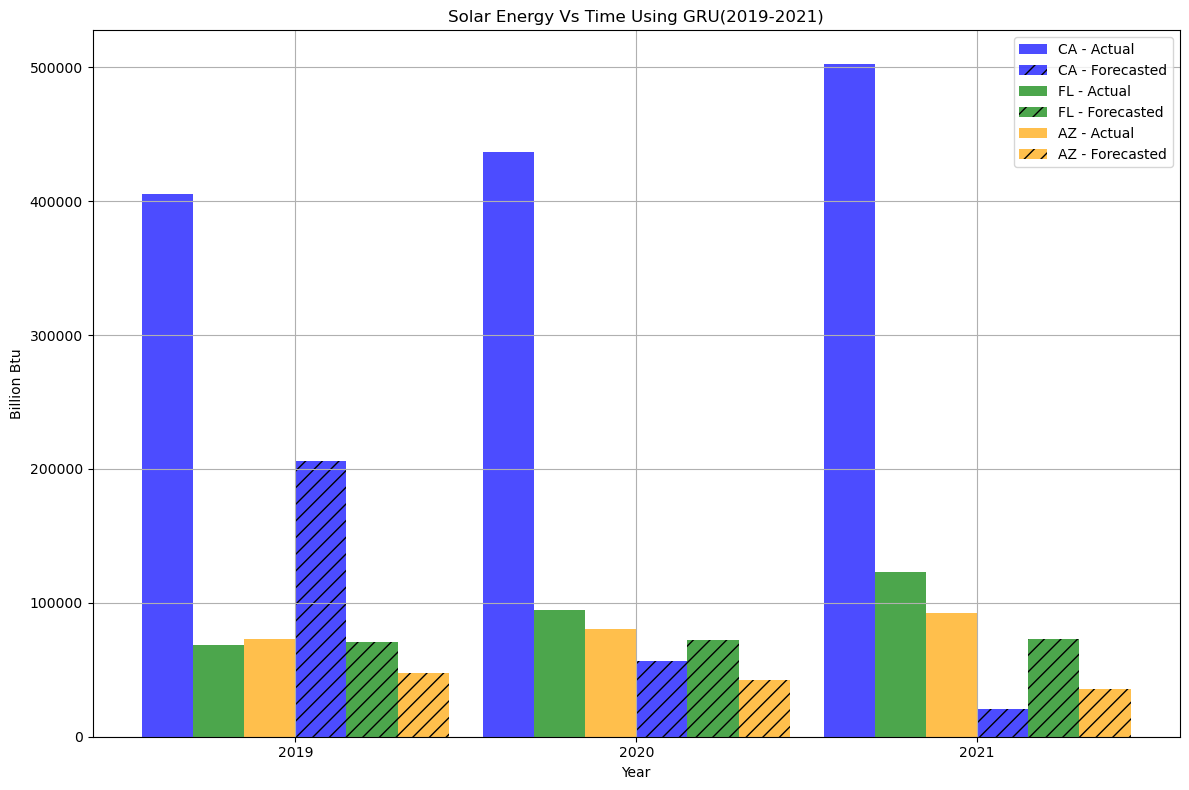

In [36]:
# Define the list of state abbreviations you want to plot
state_abbreviations =  ['CA','FL','AZ']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Solar_T.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.15 

# Define colors for each state
state_colors = {'CA': 'blue', 'FL': 'green', 'AZ': 'orange'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_gru[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Solar Energy Vs Time Using GRU(2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()


### CNN

In [22]:
# Define the sequence length and other parameters
sequence_length_cnn = 45
accuracy_threshold_cnn = 0.01  

# Loop through each selected state
state_mse_cnn = {}
state_rmse_cnn = {}
state_forecasts_cnn = {}
state_predictions_cnn = {} 

for state in ['CA','FL','AZ']:
    # Extract the data for the selected state
    data = Solar.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for CNN
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_cnn):
        seq = scaled_data[i:i + sequence_length_cnn]
        target = scaled_data[i + sequence_length_cnn]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train a CNN model
    model_cnn = Sequential()
    model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length_cnn, 1)))
    model_cnn.add(MaxPooling1D(pool_size=2))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(units=50, activation='relu'))
    model_cnn.add(Dense(units=1))
    model_cnn.compile(optimizer='adam', loss='mean_squared_error')
    # Lists to store forecasts, actual values, and predictions
    forecasts_cnn = []
    actual_values_cnn = []
    predictions_cnn = []
    # Iterate through the forecast years
    current_sequence_cnn = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
        actual_value_cnn = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_cnn.reshape(1, sequence_length_cnn, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_cnn)
        mse_cnn = mean_squared_error([actual_value_cnn], [forecast_cnn[0]])
        model_cnn.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_cnn[0])
        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_cnn > accuracy_threshold_cnn:
            continue
        else:
            forecasts_cnn.append(forecast_cnn[0])
            actual_values_cnn.append(actual_value_cnn)
            # Store the prediction for the current year
            prediction_cnn = scaler.inverse_transform(forecast_cnn.reshape(-1, 1))[0][0]
            predictions_cnn.append(prediction_cnn)
    # Inverse transform the forecasts and actual values to the original scale
    forecasts_cnn = scaler.inverse_transform(np.array(forecasts_cnn).reshape(-1, 1))
    actual_values_cnn = scaler.inverse_transform(np.array(actual_values_cnn).reshape(-1, 1))
    # Calculate the MSE
    mse_cnn = mean_squared_error(actual_values_cnn, forecasts_cnn)
    # Calculate the RMSE
    rmse_cnn = np.sqrt(mse_cnn)
    state_mse_cnn[state] = mse_cnn
    state_rmse_cnn[state] = rmse_cnn
    # Forecast for 2022
    forecast_2022_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2022_cnn[0])
    # Forecast for 2023
    forecast_2023_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    # Inverse transform the forecasts to the original scale for 2022
    forecast_2022_cnn = scaler.inverse_transform(forecast_2022_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the forecasts to the original scale for 2023
    forecast_2023_cnn = scaler.inverse_transform(forecast_2023_cnn.reshape(-1, 1))[0][0]
    state_forecasts_cnn[state] = {'2022': forecast_2022_cnn, '2023': forecast_2023_cnn}
    # Store predictions for 2019
    forecast_2019_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2019_cnn[0])
    # Store predictions for 2020
    forecast_2020_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2020_cnn[0])
    # Store predictions for 2021
    forecast_2021_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2021_cnn[0])
    # Inverse transform the predictions to the original scale for 2019
    prediction_2019_cnn = scaler.inverse_transform(forecast_2019_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the predictions to the original scale for 2020
    prediction_2020_cnn = scaler.inverse_transform(forecast_2020_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the predictions to the original scale for 2021
    prediction_2021_cnn = scaler.inverse_transform(forecast_2021_cnn.reshape(-1, 1))[0][0]
    # store the values for 2019,2020 and 2021
    state_predictions_cnn[state] = {'2019': prediction_2019_cnn, '2020': prediction_2020_cnn, '2021': prediction_2021_cnn}
# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_cnn.items():
    print(f"MSE for {state} (CNN): {mse_value:.2f}") 
# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_cnn.items():
    print(f"RMSE for {state} (CNN): {rmse_value:.2f}")
# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_cnn.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")
# Print predictions for 2019, 2020, and 2021 for selected states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_cnn.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")
# Calculate and store accuracy for each state and year for CNN
state_accuracies_cnn = {}
for state in state_predictions_cnn:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Solar.loc[state].loc[int(year)]
        predicted_value = state_predictions_cnn[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_cnn[state] = accuracies_state
# Print accuracies for each state and year for CNN
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (CNN):")
for state, accuracies_state in state_accuracies_cnn.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 267ms/step
Epoch 1/20
18/18 [==============================] - 1s 3ms/step - loss: 0.1389
Epoch 2/20
18/18 [==============================] - 0s 4ms/step - loss: 0.0900
Epoch 3/20
18/18 [==============================] - 0s 4ms/step - loss: 0.0737
Epoch 4/20
18/18 [==============================] - 0s 4ms/step - loss: 0.0662
Epoch 5/20
18/18 [==============================] - 0s 4ms/step - loss: 0.0653
Epoch 6/20
18/18 [==============================] - 0s 4ms/step - loss: 0.0622
Epoch 7/20
18/18 [==============================] - 0s 3ms/step - loss: 0.0598
Epoch 8/20
18/18 [==============================] - 0s 4ms/step - loss: 0.0564
Epoch 9/20
18/18 [==============================] - 0s 4ms/step - loss: 0.0601
Epoch 10/20
18/18 [==============================] - 0s 3ms/step - loss: 0.0598
Epoch 11/20
18/18 [==============================] - 0s 3ms/step - loss: 0.0601
Epoch 12/20
18/18 [==============================] - 0s 5ms/step - loss: 0.0

27/27 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 20/20
1/1 [==============================] - 0s 26ms/step
Epoch 1/20
28/28 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 2/20
28/28 [==============================] - 0s 3ms/step - loss: 0.0203
Epoch 3/20
28/28 [==============================] - 0s 3ms/step - loss: 0.0239
Epoch 4/20
28/28 [==============================] - 0s 3ms/step - loss: 0.0202
Epoch 5/20
28/28 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 6/20
28/28 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 7/20
28/28 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 8/20
28/28 [==============================] - 0s 2ms/step - loss: 0.0240
Epoch 9/20
28/28 [==============================] - 0s 2ms/step - loss: 0.0237
Epoch 10/20
28/28 [==============================] - 0s 3ms/step - loss: 0.0245
Epoch 11/20
28/28 [==============================] - 0s 3ms/step - loss: 0.02

37/37 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 18/20
37/37 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 19/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 20/20
1/1 [==============================] - 0s 25ms/step
Epoch 1/20
38/38 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 2/20
38/38 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 3/20
38/38 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 4/20
38/38 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 5/20
38/38 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 7/20
38/38 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 8/20
38/38 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 9/20
38/38 [==============================] - 0s 2ms/step - loss: 0.01

47/47 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 16/20
47/47 [==============================] - 0s 4ms/step - loss: 0.0126
Epoch 17/20
47/47 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 18/20
47/47 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 19/20
47/47 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 20/20
1/1 [==============================] - 0s 28ms/step
Epoch 1/20
48/48 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 2/20
48/48 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 3/20
48/48 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 4/20
48/48 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 6/20
48/48 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 7/20
48/48 [==============================] - 0s 3ms/step - loss: 0.

57/57 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 14/20
57/57 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 15/20
57/57 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 16/20
57/57 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 17/20
57/57 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 18/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 19/20
57/57 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
58/58 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 2/20
58/58 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 3/20
58/58 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 4/20
58/58 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 5/20
58/58 [==============================] - 0s 3ms/step - loss: 

22/22 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.0262
Epoch 10/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0309
Epoch 11/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0342
Epoch 12/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0258
Epoch 13/20
22/22 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 14/20
22/22 [==============================] - 0s 2ms/step - loss: 0.0290
Epoch 15/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 16/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0284
Epoch 17/20
22/22 [==============================] - 0s 2ms/step - loss: 0.0246
Epoch 18/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0282
Epoch 19/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0248
Epoch 20/20
1/1 [==============================] - 0s

32/32 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0187
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0174
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 12/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 13/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 14/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0187
Epoch 15/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 16/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 17/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0186
Epoch 18/20
32/32 [==============================] - 0s

42/42 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 5/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 6/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 7/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 8/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 9/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 10/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 11/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 12/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 13/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 14/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 15/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 16/20
42/42 [==============================] - 0s 3

52/52 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 3/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 4/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 5/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 6/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 7/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 8/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 9/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 10/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 11/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 12/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 13/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 14/20
52/52 [==============================] - 0s 3ms

1/1 [==============================] - 0s 40ms/step
Epoch 1/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 2/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 3/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 4/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 5/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 6/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 7/20
62/62 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 8/20
62/62 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 9/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0089
Epoch 10/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0088
Epoch 11/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0090
Epoch 12/20
62/62 [==============================] - 0s 5ms/step - loss: 0.00

26/26 [==============================] - 0s 3ms/step - loss: 0.0227
Epoch 17/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0239
Epoch 18/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0226
Epoch 19/20
26/26 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 20/20
1/1 [==============================] - 0s 45ms/step
Epoch 1/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0238
Epoch 2/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0236
Epoch 3/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0236
Epoch 4/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0250
Epoch 5/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0282
Epoch 6/20
27/27 [==============================] - 0s 2ms/step - loss: 0.0209
Epoch 7/20
27/27 [==============================] - 0s 2ms/step - loss: 0.0244
Epoch 8/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0

36/36 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 15/20
36/36 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 16/20
36/36 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 17/20
36/36 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 18/20
36/36 [==============================] - 0s 3ms/step - loss: 0.0161
Epoch 19/20
36/36 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
37/37 [==============================] - 0s 3ms/step - loss: 0.0238
Epoch 2/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 3/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 4/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 5/20
37/37 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 6/20
37/37 [==============================] - 0s 3ms/step - loss: 0

46/46 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 13/20
46/46 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 14/20
46/46 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 15/20
46/46 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 16/20
46/46 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 17/20
46/46 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 18/20
46/46 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 19/20
46/46 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 20/20
1/1 [==============================] - 0s 27ms/step
Epoch 1/20
47/47 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 2/20
47/47 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 3/20
47/47 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 4/20
47/47 [==============================] - 0s 2ms/step - loss:

56/56 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 13/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 14/20
56/56 [==============================] - 0s 4ms/step - loss: 0.0121
Epoch 15/20
56/56 [==============================] - 0s 4ms/step - loss: 0.0117
Epoch 16/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 17/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 19/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 20/20
1/1 [==============================] - 0s 48ms/step
Epoch 1/20
57/57 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 2/20
57/57 [==============================] - 0s 3ms/step - los

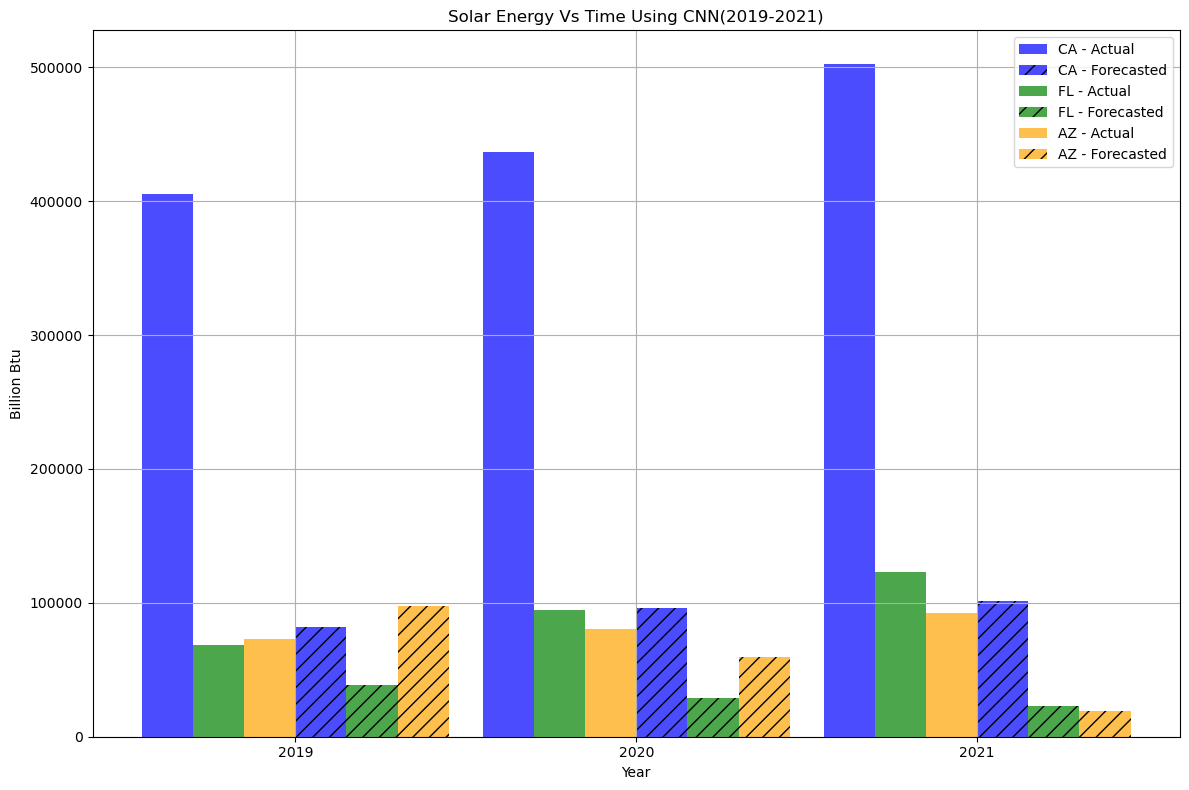

In [37]:
# Define the list of state abbreviations you want to plot
state_abbreviations =  ['CA','FL','AZ']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Solar_T.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.15 

# Define colors for each state
state_colors = {'CA': 'blue', 'FL': 'green', 'AZ': 'orange'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_cnn[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Solar Energy Vs Time Using CNN(2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()


## Machine Learning Forecasting 

### ARIMA

In [4]:
# Function to perform ARIMA forecast
def arima_forecast(state_data, state_name, order=(5, 1, 0), forecast_steps=2):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(state_data.reshape(-1, 1))
    # split the training data
    train_size = int(len(scaled_data) * 0.8)
    train, test = scaled_data[:train_size], scaled_data[train_size:]
    # model 
    model = ARIMA(train, order=order)
    fit_model = model.fit()
    # forecast value
    forecast_values_arima = fit_model.forecast(steps=len(scaled_data) - train_size + forecast_steps)
    forecast_values_arima = scaler.inverse_transform(forecast_values_arima.reshape(-1, 1))
    # mse and rmse 
    mse_arima = mean_squared_error(state_data[train_size:], forecast_values_arima[:len(state_data) - train_size])
    rmse_arima = np.sqrt(mse_arima)
    # Forecasting 
    forecast_years_arima = forecast_values_arima[:len(state_data)]
    return mse_arima, rmse_arima, forecast_years_arima

# Selected states
selected_states =  ['CA','FL','AZ']

# Dictionaries to store results
mse_arima_dict = {}
rmse_arima_dict = {}
forecast_years_arima_dict = {}
accuracy_arima_dict = {}

# Loop through each selected state for ARIMA
for state in selected_states:
    state_data = Solar.loc[state].values
    mse_arima, rmse_arima, forecast_years_arima = arima_forecast(state_data, state, order=(5, 1, 0), forecast_steps=2)
    mse_arima_dict[state] = mse_arima
    rmse_arima_dict[state] = rmse_arima
    forecast_years_arima_dict[state] = forecast_years_arima
    
    # Calculate accuracy for each year
    actual_data = state_data[-3:]
    forecasted_data = forecast_years_arima[:3]
    accuracies = np.abs((forecasted_data - actual_data) / actual_data) * 100
    # arima accuracy dictanary 
    accuracy_arima_dict[state] = {
        '2019': accuracies[0][0],
        '2020': accuracies[1][0],
        '2021': accuracies[2][0]
    }

# Print the actual and forecasted values for each year and accuracy for each state
for state in selected_states:
    print(f"Accuracy for {state} (ARIMA) - 2019: {accuracy_arima_dict[state]['2019']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2020: {accuracy_arima_dict[state]['2020']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2021: {accuracy_arima_dict[state]['2021']:.2f}%")



# Print the forecasted values for 2022 and 2023 for all states
print("\nForecasted Values for 2022 and 2023 (ARIMA):")
for year in range(2022, 2024):
    print(f"Forecasts for {year}:")
    for state in selected_states:
        forecast_value = forecast_years_arima_dict[state][year - 2019][0]
        print(f"{state}: {forecast_value:.2f}")

# Print MSE for all states
print("\nMean Squared Error (MSE) for All states:")
for state, mse_value in mse_arima_dict.items():
    print(f"MSE for {state} (ARIMA): {mse_value:.2f}")

# Print RMSE for all states
print("\nRoot Mean Squared Error (RMSE) for All states:")
for state, rmse_value in rmse_arima_dict.items():
    print(f"RMSE for {state} (ARIMA): {rmse_value:.2f}")

Accuracy for CA (ARIMA) - 2019: 92.53%
Accuracy for CA (ARIMA) - 2020: 92.42%
Accuracy for CA (ARIMA) - 2021: 92.39%
Accuracy for FL (ARIMA) - 2019: 65.44%
Accuracy for FL (ARIMA) - 2020: 65.44%
Accuracy for FL (ARIMA) - 2021: 65.40%
Accuracy for AZ (ARIMA) - 2019: 95.73%
Accuracy for AZ (ARIMA) - 2020: 95.71%
Accuracy for AZ (ARIMA) - 2021: 95.70%

Forecasted Values for 2022 and 2023 (ARIMA):
Forecasts for 2022:
CA: 31100.85
FL: 23650.44
AZ: 3158.63
Forecasts for 2023:
CA: 31214.86
FL: 23662.69
AZ: 3161.68

Mean Squared Error (MSE) for All states:
MSE for CA (ARIMA): 65481396033.41
MSE for FL (ARIMA): 1392957570.74
MSE for AZ (ARIMA): 2655898619.84

Root Mean Squared Error (RMSE) for All states:
RMSE for CA (ARIMA): 255893.33
RMSE for FL (ARIMA): 37322.35
RMSE for AZ (ARIMA): 51535.41


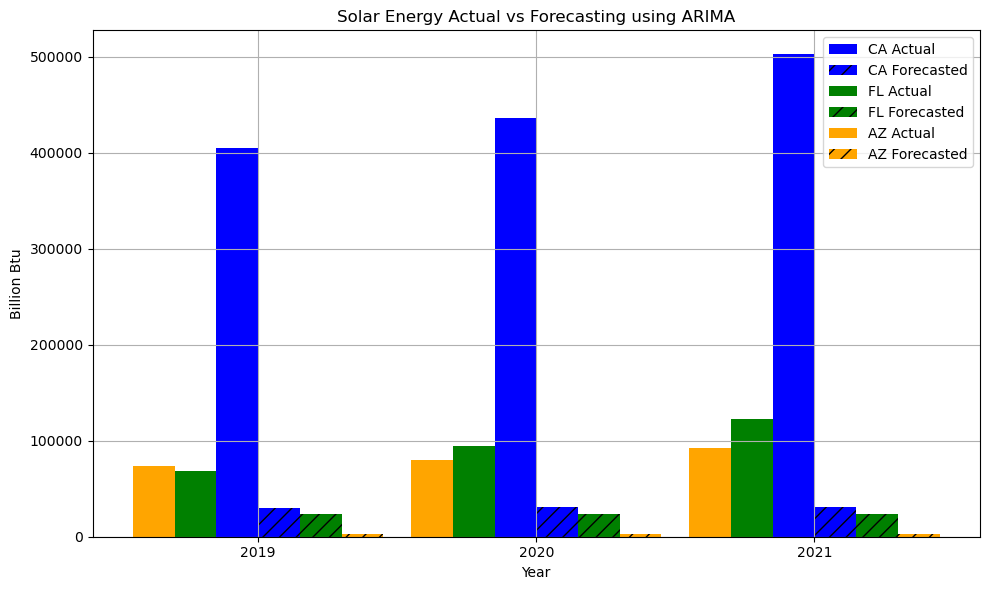

In [5]:
# Define colors for each state
state_colors = {'CA': 'blue', 'FL': 'green', 'AZ': 'orange'}

# Create a figure
plt.figure(figsize=(10, 6))

# Define the width of the bars and the space between bar groups
bar_width = 0.15  
space = np.arange(len(range(2019, 2022)))

# Loop through each selected state
for i, state in enumerate(selected_states):
    # Extract actual and forecasted data
    actual_data = Solar.loc[state].values[-3:]
    forecasted_data = np.array(forecast_years_arima_dict[state][:3]).flatten() 

    # Generate x values (years)
    years = range(2019, 2022)

    # Plot actual data with custom color on the left side
    plt.bar(space - bar_width/2 - i*bar_width, actual_data, bar_width, label=f'{state} Actual', color=state_colors[state])

    # Plot forecasted data with hatch pattern and custom color on the right side
    plt.bar(space + bar_width/2 + i*bar_width, forecasted_data, bar_width, label=f'{state} Forecasted', color=state_colors[state], hatch='//')

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Solar Energy Actual vs Forecasting using ARIMA')

# Add xticks
plt.xticks(space, years)

# Add a legend
plt.legend()

# Add grid
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### Saving all the values in csv file

In [13]:
# Continue with creating the combined DataFrame and saving it to a CSV file
df_combined_results = pd.DataFrame({
    'State': list(state_mse_gru.keys()),
    'MSE_lstm': list(state_mse_lstm.values()),
    'RMSE_lstm': list(state_rmse_lstm.values()),
    'Forecast_2022_lstm': [state_forecasts_lstm[state]['2022'] for state in state_forecasts_lstm],
    'Forecast_2023_lstm': [state_forecasts_lstm[state]['2023'] for state in state_forecasts_lstm],
    'MSE_cnn': list(state_mse_cnn.values()),
    'RMSE_cnn': list(state_rmse_cnn.values()),
    'Forecast_2022_cnn': [state_forecasts_cnn[state]['2022'] for state in state_forecasts_cnn],
    'Forecast_2023_cnn': [state_forecasts_cnn[state]['2023'] for state in state_forecasts_cnn],
    'MSE_gru': list(state_mse_gru.values()),
    'RMSE_gru': list(state_rmse_gru.values()),
    'Forecast_2022_gru': [state_forecasts_gru[state]['2022'] for state in state_forecasts_gru],
    'Forecast_2023_gru': [state_forecasts_gru[state]['2023'] for state in state_forecasts_gru],
    'MSE_arima': [mse_arima_dict[state] for state in selected_states],
    'RMSE_arima': [rmse_arima_dict[state] for state in selected_states],
    'Forecast_2022_arima': [forecast_years_arima_dict[state][2][0] for state in selected_states],  
    'Forecast_2023_arima': [forecast_years_arima_dict[state][3][0] for state in selected_states],  
})

# Save combined DataFrame to a CSV file
df_combined_results.to_csv('combined_results_solar.csv', index=False)
